# **Project Name**    -  **EMIPredict AI — Intelligent Financial Risk Assessment Platform**



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**   Mangal Singh


# **Project Summary -**

**Project goal**
Build a production-ready FinTech platform that predicts EMI eligibility (classification) and the maximum safe monthly EMI (regression), with MLflow experiment tracking and a Streamlit web UI. 

---

## Problem statement

Many borrowers face EMI repayment issues due to weak financial planning and unstructured risk assessment. This project provides data-driven loan eligibility and EMI amount recommendations to support faster, more accurate lending decisions. 

---

## Dataset (EMI_dataset)

* **Scale:** 400,000 realistic profiles.
* **Features:** 22 variables (personal demographics, employment & income, housing, monthly obligations, credit history, loan request details).
* **Targets:** `emi_eligibility` (3 classes: Eligible / High_Risk / Not_Eligible) and `max_monthly_emi` (continuous).
* **Five EMI scenarios** (each ~80k records): E-commerce, Home Appliances, Vehicle, Personal Loan, Education. 

---

## High-level approach (7 steps)

1. **Data loading & preprocessing** — cleaning, missing-value handling, validation, train/val/test splits. 
2. **Exploratory Data Analysis (EDA)** — distributions, correlations, scenario-specific patterns. 
3. **Feature engineering** — debt-to-income, expense ratios, affordability scores, categorical encoding, interaction features. 
4. **Model development**

   * *Classification (eligibility):* logistic regression, random forest, XGBoost (min 3 models).
   * *Regression (max EMI):* linear regression, random forest regressor, XGBoost regressor (min 3 models).
   * Evaluate with accuracy/precision/recall/F1/ROC-AUC for classification; RMSE/MAE/R²/MAPE for regression. 
5. **MLflow integration & model selection** — track experiments, log parameters/metrics/artifacts, use model registry. 
6. **Streamlit app** — multi-page UI with real-time predictions, visualizations, MLflow dashboard integration, admin CRUD for data. 
7. **Cloud deployment** — Streamlit Cloud hosting, GitHub CI/CD pipeline, responsive UI and performance testing. 

---

## Expected outcomes & metrics

* **Technical targets:** classification accuracy > 90% and regression RMSE < ₹2,000 (goal). 
* **Business impact:** reduce manual underwriting time (~80%), enable risk-based pricing, and support real-time eligibility checks for lenders and FinTech apps. 

---

## Deliverables

* Data preprocessing, EDA and feature-engineering scripts. 
* At least 3 classification and 3 regression models with performance comparison and selected best models. 
* MLflow experiment logs and model registry. 
* Multi-page Streamlit app with deployment on Streamlit Cloud and public URL. 
* Documentation: methodology, EDA report, model comparison, business recommendations. 

---

## Tech stack / tags

Python, scikit-learn, XGBoost, MLflow, Streamlit Cloud, GitHub (CI/CD), data processing & visualization tools. 

---

## Timeline

Target completion: **14 days** (phased across preprocessing → modeling → app → deployment → testing). 

---

# **GitHub Link -**

https://github.com/mangal-singh001/EMIPredict-AI---Intelligent-Financial-Risk-Assessment-Platform-ML-Project

# **Problem Statement**


Many borrowers face EMI repayment issues due to weak financial planning and unstructured risk assessment. This project provides data-driven loan eligibility and EMI amount recommendations to support faster, more accurate lending decisions.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

### Dataset Loading

In [26]:
df = pd.read_csv(r"F:\Data Science\ML Projects\Labmentix\EMIPredict AI - Intelligent Financial Risk Assessment Platform\emi_prediction_dataset.csv")

C:\Users\HP\AppData\Local\Temp\ipykernel_25272\3418469759.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"F:\Data Science\ML Projects\Labmentix\EMIPredict AI - Intelligent Financial Risk Assessment Platform\emi_prediction_dataset.csv")


### Dataset First View

In [27]:
df.head()

,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
0,38,Female,Married,Professional,82600,Private,0.9,Mid-size,Rented,20000.0,...,Yes,23700,660.0,303200,70200.0,Personal Loan EMI,850000,15,Not_Eligible,500.0
1,38,Female,Married,Graduate,21500,Private,7.0,MNC,Family,0.0,...,Yes,4100,714.0,92500,26900.0,E-commerce Shopping EMI,128000,19,Not_Eligible,700.0
2,38,Male,Married,Professional,86100,Private,5.8,Startup,Own,0.0,...,No,0,650.0,672100,324200.0,Education EMI,306000,16,Eligible,27775.0
3,58,Female,Married,High School,66800,Private,2.2,Mid-size,Own,0.0,...,No,0,685.0,440900,178100.0,Vehicle EMI,304000,83,Eligible,16170.0
4,48,Female,Married,Professional,57300,Private,3.4,Mid-size,Family,0.0,...,No,0,770.0,97300,28200.0,Home Appliances EMI,252000,7,Not_Eligible,500.0


### Dataset Rows & Columns count

In [28]:
sh = df.shape
print(f"Number of Rows : {sh[0]}")
print(f"Number of columns : {sh[1]}")

Number of Rows : 404800
Number of columns : 27


### Dataset Information

In [29]:
info_df = pd.DataFrame({
    'Column': df.columns,
    'Non-Null Count': df.notnull().sum(),
    'Null Count': df.isnull().sum(),
    'Dtype': df.dtypes
}).reset_index(drop=True)

info_df

,Column,Non-Null Count,Null Count,Dtype
0,age,404800,0,object
1,gender,404800,0,object
2,marital_status,404800,0,object
3,education,402396,2404,object
4,monthly_salary,404800,0,object
5,employment_type,404800,0,object
6,years_of_employment,404800,0,float64
7,company_type,404800,0,object
8,house_type,404800,0,object
9,monthly_rent,402374,2426,float64


In [30]:
df['existing_loans'] = df['existing_loans'].map({"Yes":1,"No":0})

In [31]:
cat_cols = [
    'gender', 'marital_status', 'education', 'employment_type',
    'company_type', 'house_type',
    'emi_scenario', 'emi_eligibility'
]
df[cat_cols] = df[cat_cols].astype('category')

In [36]:
cols = ["age", "credit_score", "existing_loans","monthly_salary","bank_balance"]

for col in cols:
    # # Remove invalid characters (like extra dots, spaces, etc.)
    df[col] = df[col].astype(str).str.replace('[^0-9.-]', '', regex=True)
    
    # Convert to numeric (invalid parsing becomes NaN)
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # # Finally convert to int after fixing
    df[col] = df[col].fillna(0).astype(int)


In [37]:
columns = pd.DataFrame({
    "Columns" : df.columns,
    "Non Null Count": df.notnull().sum(),
    "Null Count" : df.isnull().sum(),
    "Data Types" : df.dtypes
}).reset_index(drop=True)

columns

,Columns,Non Null Count,Null Count,Data Types
0,age,404800,0,int32
1,gender,404800,0,category
2,marital_status,404800,0,category
3,education,402396,2404,category
4,monthly_salary,404800,0,int32
5,employment_type,404800,0,category
6,years_of_employment,404800,0,float64
7,company_type,404800,0,category
8,house_type,404800,0,category
9,monthly_rent,402374,2426,float64


#### Duplicate Values

In [38]:
df.duplicated().sum()

0

#### Missing Values/Null Values

In [39]:
df.isnull().sum()

age                          0
gender                       0
marital_status               0
education                 2404
monthly_salary               0
employment_type              0
years_of_employment          0
company_type                 0
house_type                   0
monthly_rent              2426
family_size                  0
dependents                   0
school_fees                  0
college_fees                 0
travel_expenses              0
groceries_utilities          0
other_monthly_expenses       0
existing_loans               0
current_emi_amount           0
credit_score                 0
bank_balance                 0
emergency_fund            2351
emi_scenario                 0
requested_amount             0
requested_tenure             0
emi_eligibility              0
max_monthly_emi              0
dtype: int64

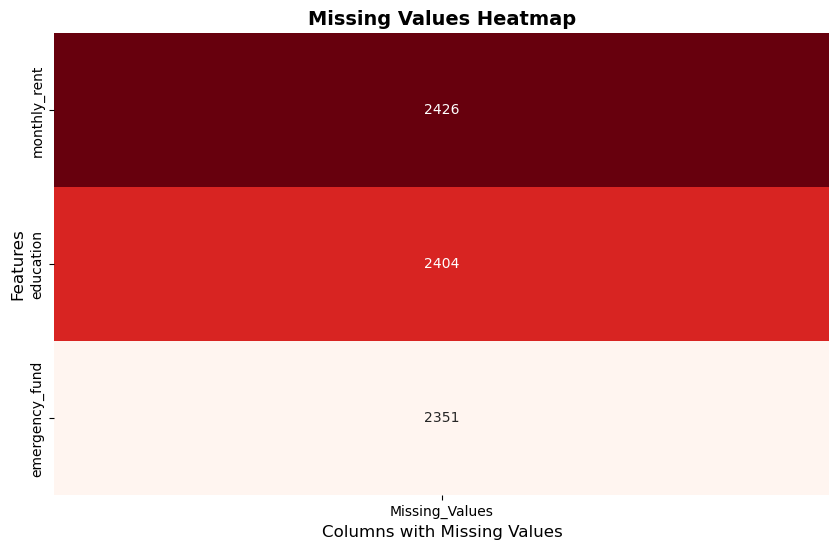

In [40]:
# Create missing value DataFrame
missing_values = df.isnull().sum().to_frame(name='Missing_Values')
missing_values = missing_values[missing_values['Missing_Values'] > 0].sort_values(by='Missing_Values', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values, annot=True, cmap="Reds", fmt='g', cbar=False)
plt.title("Missing Values Heatmap", fontsize=14, fontweight='bold')
plt.xlabel("Columns with Missing Values", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.show()


In [43]:
# Median rent for renters (use only nonzero rent)
median_rent = df.loc[df['monthly_rent'] > 0, 'monthly_rent'].median()

# Conditional imputations:
# 1. If Own → rent = 0
df.loc[(df['house_type'] == 'Own') & (df['monthly_rent'].isna()), 'monthly_rent'] = 0

# 2. If Family → rent = 0 (they may not pay rent directly)
df.loc[(df['house_type'] == 'Family') & (df['monthly_rent'].isna()), 'monthly_rent'] = 0

# 3. If Rented → use median rent
df.loc[(df['house_type'] == 'Rented') & (df['monthly_rent'].isna()), 'monthly_rent'] = median_rent

# 4. Fill any remaining with overall median as a fallback
df['monthly_rent'] = df['monthly_rent'].fillna(median_rent)


mode_edu = df['education'].astype(str).mode(dropna=True)[0]
df['education'] = df['education'].fillna(mode_edu).astype('category')

df['emergency_fund'] = df['emergency_fund'].fillna(df['emergency_fund'].median())



In [44]:
df.isnull().sum()

age                       0
gender                    0
marital_status            0
education                 0
monthly_salary            0
employment_type           0
years_of_employment       0
company_type              0
house_type                0
monthly_rent              0
family_size               0
dependents                0
school_fees               0
college_fees              0
travel_expenses           0
groceries_utilities       0
other_monthly_expenses    0
existing_loans            0
current_emi_amount        0
credit_score              0
bank_balance              0
emergency_fund            0
emi_scenario              0
requested_amount          0
requested_tenure          0
emi_eligibility           0
max_monthly_emi           0
dtype: int64

In [45]:
df.head()

,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
0,38,Female,Married,Professional,82600,Private,0.9,Mid-size,Rented,20000.0,...,1,23700,660,303200,70200.0,Personal Loan EMI,850000,15,Not_Eligible,500.0
1,38,Female,Married,Graduate,21500,Private,7.0,MNC,Family,0.0,...,1,4100,714,92500,26900.0,E-commerce Shopping EMI,128000,19,Not_Eligible,700.0
2,38,Male,Married,Professional,86100,Private,5.8,Startup,Own,0.0,...,0,0,650,672100,324200.0,Education EMI,306000,16,Eligible,27775.0
3,58,Female,Married,High School,66800,Private,2.2,Mid-size,Own,0.0,...,0,0,685,440900,178100.0,Vehicle EMI,304000,83,Eligible,16170.0
4,48,Female,Married,Professional,57300,Private,3.4,Mid-size,Family,0.0,...,0,0,770,97300,28200.0,Home Appliances EMI,252000,7,Not_Eligible,500.0


### What did you know about your dataset?

###  **Dataset Description**

This dataset contains detailed financial and personal information of **around 400,000 customers**, collected to assess their **EMI eligibility** and to estimate the **maximum EMI amount** they can safely afford.

Each row represents a unique customer profile, combining demographic, employment, income, and expense details. The dataset has **27 columns**, including both input features and target variables for classification and regression tasks.



### **About the Data**

* The **age** of customers ranges roughly from **25 to 60 years**.
* **Gender, marital status, and education** describe personal and social background.
* **Monthly salary, employment type, and years of employment** reflect income and job stability.
* **House type, rent, and dependents** show family responsibilities and housing costs.
* **Financial variables** like `bank_balance`, `emergency_fund`, and `credit_score` measure financial strength and repayment capacity.
* **EMI details** (like scenario, requested amount, and tenure) show the customer’s loan request.
* The dataset ends with two targets:

  * `emi_eligibility` — the **classification label** (Eligible, High_Risk, Not_Eligible)
  * `max_monthly_emi` — the **regression target**, i.e., the safe EMI amount the customer can afford.

---

###  **Current Data Status**

* No missing or inconsistent values remain after preprocessing.
* All numeric and categorical datatypes are corrected.
* The dataset is fully cleaned and ready for **Exploratory Data Analysis (EDA)** in the next phase.

---


## ***2. Understanding Your Variables***

In [46]:
df.dtypes

age                          int32
gender                    category
marital_status            category
education                 category
monthly_salary               int32
employment_type           category
years_of_employment        float64
company_type              category
house_type                category
monthly_rent               float64
family_size                  int64
dependents                   int64
school_fees                  int64
college_fees                 int64
travel_expenses              int64
groceries_utilities          int64
other_monthly_expenses       int64
existing_loans               int32
current_emi_amount           int64
credit_score                 int32
bank_balance                 int32
emergency_fund             float64
emi_scenario              category
requested_amount             int64
requested_tenure             int64
emi_eligibility           category
max_monthly_emi            float64
dtype: object

In [47]:
df.describe()

,age,monthly_salary,years_of_employment,monthly_rent,family_size,dependents,school_fees,college_fees,travel_expenses,groceries_utilities,other_monthly_expenses,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,requested_amount,requested_tenure,max_monthly_emi
count,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,4.048000e+05,404800.000000,4.048000e+05,404800.000000,404800.000000
mean,38.875543,59216.351082,5.364079,5822.511927,2.940425,1.940425,4624.575593,4066.253706,5687.497777,12804.999506,7119.309783,0.399143,4543.407609,696.666322,2.390422e+05,96636.813488,3.708554e+05,29.126677,6763.602156
std,9.304140,43481.324981,6.079135,8635.860696,1.075199,1.075199,5061.074401,7319.344289,3392.671132,6993.853745,4510.447300,0.489723,7034.901139,103.407260,1.839118e+05,81154.854810,3.451945e+05,18.100854,7741.263317
min,0.000000,0.000000,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,600.000000,1800.000000,600.000000,0.000000,0.000000,0.000000,0.000000e+00,1400.000000,1.000000e+04,3.000000,500.000000
25%,32.000000,35100.000000,1.200000,0.000000,2.000000,1.000000,0.000000,0.000000,3200.000000,7700.000000,3800.000000,0.000000,0.000000,653.000000,1.017000e+05,38600.000000,1.240000e+05,15.000000,500.000000
50%,38.000000,51500.000000,3.200000,0.000000,3.000000,2.000000,3000.000000,0.000000,4900.000000,11400.000000,6000.000000,0.000000,0.000000,700.000000,1.937000e+05,74000.000000,2.360000e+05,25.000000,4211.200000
75%,48.000000,72800.000000,7.200000,10700.000000,4.000000,3.000000,9000.000000,6500.000000,7400.000000,16400.000000,9300.000000,1.000000,8000.000000,748.000000,3.292000e+05,130200.000000,4.940000e+05,40.000000,9792.000000
max,59.000000,499970.000000,36.000000,80000.000000,5.000000,4.000000,15000.000000,25000.000000,30300.000000,71200.000000,42900.000000,1.000000,56300.000000,1200.000000,1.717300e+06,891500.000000,1.500000e+06,84.000000,91040.400000


### Variables Description

| **Variable Name**          | **Type** | **Description**                                                                                |
| -------------------------- | -------- | ---------------------------------------------------------------------------------------------- |
| **age**                    | Int64    | Age of the customer (in years), typically between 25–60.                                       |
| **gender**                 | Category | Gender of the applicant – Male or Female.                                                      |
| **marital_status**         | Category | Marital status – whether the applicant is Single or Married.                                   |
| **education**              | Category | Highest education level attained – High School, Graduate, Postgraduate, or Professional.       |
| **monthly_salary**         | Float64  | The customer’s gross monthly income (in INR).                                                  |
| **employment_type**        | Category | Employment sector – Private, Government, or Self-employed.                                     |
| **years_of_employment**    | Float64  | Total work experience in years (may include decimals for partial years).                       |
| **company_type**           | Category | Type of organization – Startup, Mid-size, or MNC.                                              |
| **house_type**             | Category | Living arrangement – Own, Rented, or Family-owned house.                                       |
| **monthly_rent**           | Float64  | Monthly house rent amount (0 if owned or family house).                                        |
| **family_size**            | Int64    | Total number of family members living together.                                                |
| **dependents**             | Int64    | Number of financially dependent members.                                                       |
| **school_fees**            | Int64    | Monthly educational expenses for school-going dependents.                                      |
| **college_fees**           | Int64    | Monthly educational expenses for college-going dependents.                                     |
| **travel_expenses**        | Int64    | Monthly transportation or commute expenses.                                                    |
| **groceries_utilities**    | Int64    | Monthly spending on groceries, utilities, and basic living needs.                              |
| **other_monthly_expenses** | Int64    | Miscellaneous monthly expenses not covered in other categories.                                |
| **existing_loans**         | Int64    | Binary indicator (1 = has existing loans, 0 = no existing loans).                              |
| **current_emi_amount**     | Int64    | Current total EMI being paid monthly (across existing loans).                                  |
| **credit_score**           | Int64    | Customer’s credit score (range 300–850), indicating creditworthiness.                          |
| **bank_balance**           | Float64  | Current available bank account balance (in INR).                                               |
| **emergency_fund**         | Float64  | Amount reserved as an emergency fund or savings buffer.                                        |
| **emi_scenario**           | Category | Type of EMI requested – E-commerce, Home Appliances, Vehicle, Personal Loan, or Education EMI. |
| **requested_amount**       | Int64    | The loan amount the customer has requested (in INR).                                           |
| **requested_tenure**       | Int64    | Preferred repayment period in months.                                                          |
| **emi_eligibility**        | Category | Classification target: Eligible / High_Risk / Not_Eligible.                                    |
| **max_monthly_emi**        | Float64  | Regression target: maximum EMI amount the customer can safely afford.                          |

---

### **Summary**

* **Total Variables:** 27
* **Numeric Variables:** 16
* **Categorical Variables:** 9
* **Target Variables:** 2
* **Domain:** Financial risk assessment for EMI prediction

---


### Check Unique Values for each variable.

In [48]:
df.nunique()

age                          16
gender                        8
marital_status                2
education                     4
monthly_salary            12781
employment_type               3
years_of_employment         356
company_type                  5
house_type                    3
monthly_rent               4396
family_size                   5
dependents                    5
school_fees                 132
college_fees                202
travel_expenses             284
groceries_utilities         544
other_monthly_expenses      373
existing_loans                2
current_emi_amount          508
credit_score                427
bank_balance              10615
emergency_fund             5486
emi_scenario                  5
requested_amount           1491
requested_tenure             82
emi_eligibility               3
max_monthly_emi           15383
dtype: int64

In [49]:
# Now i change the values of the gender table like 'F','FEMALE','female' to 'Female' and 'M','MALE','male' to 'Male'

df['gender'] = df['gender'].replace(['M','MALE','male'],'Male')
df['gender'] = df['gender'].replace(['F','FEMALE','female'],'Female')

C:\Users\HP\AppData\Local\Temp\ipykernel_25272\623316057.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['gender'] = df['gender'].replace(['M','MALE','male'],'Male')
C:\Users\HP\AppData\Local\Temp\ipykernel_25272\623316057.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['gender'] = df['gender'].replace(['F','FEMALE','female'],'Female')


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Distribution of Ages


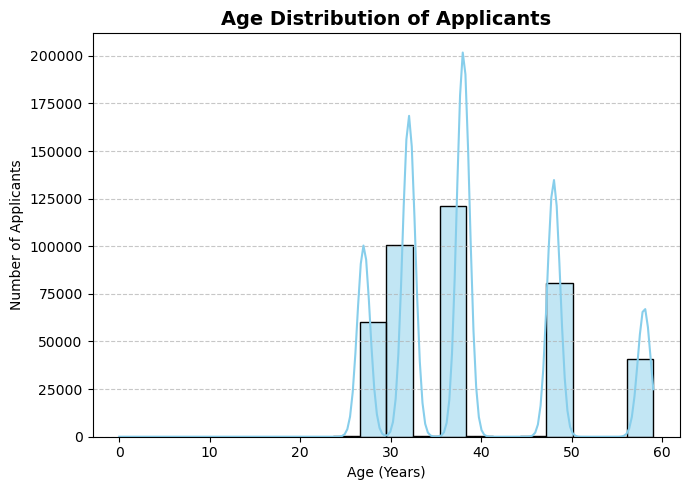

Insight: Applicants are mostly aged between 32–48 years, with an average age of 38.9. Range: 0–59.


In [50]:
# Chart 1: Age Distribution
plt.figure(figsize=(7,5))
print("Distribution of Ages")
sns.histplot(data=df, x='age', bins=20, kde=True, color='skyblue')
plt.title("Age Distribution of Applicants", fontsize=14, fontweight='bold')
plt.xlabel("Age (Years)")
plt.ylabel("Number of Applicants")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Insight
age_mean = df['age'].mean()
age_min = df['age'].min()
age_max = df['age'].max()
print(f"Insight: Applicants are mostly aged between {df['age'].quantile(0.25):.0f}–{df['age'].quantile(0.75):.0f} years, "
      f"with an average age of {age_mean:.1f}. Range: {age_min}–{age_max}.")


##### 1. Why did you pick the specific chart?

We used a Histogram (with KDE) because:

- The variable age is continuous numerical data.

- A histogram effectively shows the frequency distribution and density of applicants’ ages.

- The KDE (blue curve) adds a smooth trendline that makes it easier to spot the most common age ranges.

In short, this chart helps us understand the demographic composition of our loan applicants — an essential first step in financial risk profiling.

##### 2. What is/are the insight(s) found from the chart?

From my output : 

- There are clear peaks around 30, 35–40, and 48–50 years.

- This indicates that most applicants belong to mid-career age groups (30–50 years) — the most financially active segment.

- Very few applicants are at the extreme ends (below 28 or above 55).

- This implies the dataset is skewed toward working professionals who are stable earners.

Interpretation:
The company’s EMI products are most attractive to individuals who are in their prime earning years, possibly seeking loans for personal, vehicle, or home purposes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

- This insight helps in targeted marketing and product personalization.

- Lenders can focus their campaigns on the 30–50 age range, where credit uptake likelihood is highest.

- EMI products could be designed with tenure flexibility suited for mid-career professionals.

Potential Negative Insight:

- The dataset shows low participation of younger (<28) and older (>55) individuals.

- This could signal market under-penetration in those groups — younger people may lack credit history, and older people might be retired or less eligible.

Justification:
Although mid-age targeting boosts approval rates (positive), over-focusing on them may limit customer base growth in other segments (negative). The business should diversify loan offerings to appeal to younger applicants through smaller EMIs or secured options.

#### Chart - 2

C:\Users\HP\AppData\Local\Temp\ipykernel_25272\3375730155.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='gender', palette='pastel', edgecolor='black')


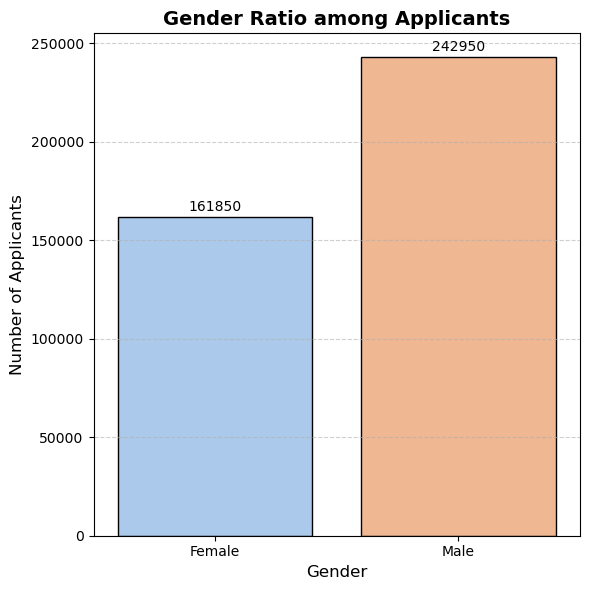

In [51]:
plt.figure(figsize=(6, 6))
plt.title("Gender Ratio among Applicants", fontsize=14, fontweight='bold')
ax = sns.countplot(data=df, x='gender', palette='pastel', edgecolor='black')

# Add labels on bars
for bars in ax.containers:
    ax.bar_label(bars, fmt='%d', label_type='edge', fontsize=10, padding=2)

plt.xlabel("Gender", fontsize=12)
plt.ylabel("Number of Applicants", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

We used a Countplot (Bar Chart) because:

- The gender column is categorical, containing two discrete groups: Male and Female.

- A countplot effectively shows how many records fall into each category.

- It gives a quick view of data imbalance, if any, which is important for fairness and bias assessment in ML models.

This chart is ideal for comparing proportions between two categories in a large dataset (like 400,000 records here).

##### 2. What is/are the insight(s) found from the chart?

From my chart:

- Male Applicants: 242,950

- Female Applicants: 161,850

Interpretation:

- The dataset has around 60% male and 40% female applicants, indicating a moderate gender gap in EMI applications.

- Males form the majority of applicants, possibly due to higher formal employment rates and credit exposure.

- However, female participation (≈40%) is still substantial — a positive sign of growing financial inclusion among women.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

- The insight helps institutions tailor marketing and product strategies.

    - They could design women-focused EMI schemes (e.g., lower interest for salaried women or self-employed entrepreneurs).

    - Helps track financial inclusion goals by gender.

- Knowing participation ratios helps ensure fair model training, preventing gender bias in predictions.

Possible Negative Insight (and Mitigation):

- The gender imbalance (≈60:40) may cause the ML model to become slightly biased toward the majority group (male), reducing predictive fairness.

- It could also reflect unequal loan access or application confidence between genders — a socio-economic factor to be addressed.

#### Chart - 3

C:\Users\HP\AppData\Local\Temp\ipykernel_25272\3705675545.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='education', palette='pastel', edgecolor='black')


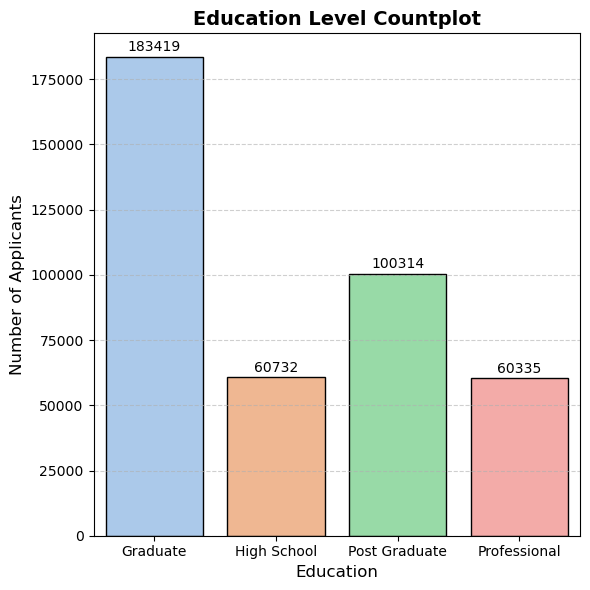

In [52]:
plt.figure(figsize=(6, 6))
plt.title("Education Level Countplot", fontsize=14, fontweight='bold')
ax = sns.countplot(data=df, x='education', palette='pastel', edgecolor='black')

# Add labels on bars
for bars in ax.containers:
    ax.bar_label(bars, fmt='%d', label_type='edge', fontsize=10, padding=2)

plt.xlabel("Education", fontsize=12)
plt.ylabel("Number of Applicants", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

- The education column is a categorical variable with discrete categories (High School, Graduate, Post Graduate, Professional).

- A Countplot (bar chart) is ideal for visualizing how many applicants fall into each education level.

- This visualization helps to understand the educational background of applicants — a key socio-economic indicator that can influence income, employment type, and thus EMI eligibility.

In financial risk analytics, education often correlates with financial literacy, income stability, and repayment capability, so it’s critical to analyze early.

##### 2. What is/are the insight(s) found from the chart?

From my plot values:

- Graduate: 183,419 applicants

- Post Graduate: 100,314 applicants

- High School: 60,732 applicants

- Professional: 60,335 applicants

Interpretation:

- The majority of applicants are Graduates (≈45%), followed by Post Graduates (≈25%).

- Only about 15% each come from High School and Professional backgrounds.

- This pattern shows that the financial product appeals primarily to individuals with a college-level education — likely due to better employment opportunities and financial literacy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

- This insight helps lenders profile their ideal customer base — educated individuals with predictable income and lower default risk.

- Financial institutions can target EMI promotions toward graduates and postgraduates via professional networks, employment-based campaigns, or digital channels.

- It supports model accuracy since education can be used as a predictive feature for creditworthiness.

Potential Negative Insight:

- The lower representation of non-graduates (High School level) might indicate limited financial access for less-educated individuals.

- If models are trained on such data, they may unintentionally penalize applicants with lower education levels, creating a bias in credit scoring.

#### Chart - 4

C:\Users\HP\AppData\Local\Temp\ipykernel_25272\3836966031.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


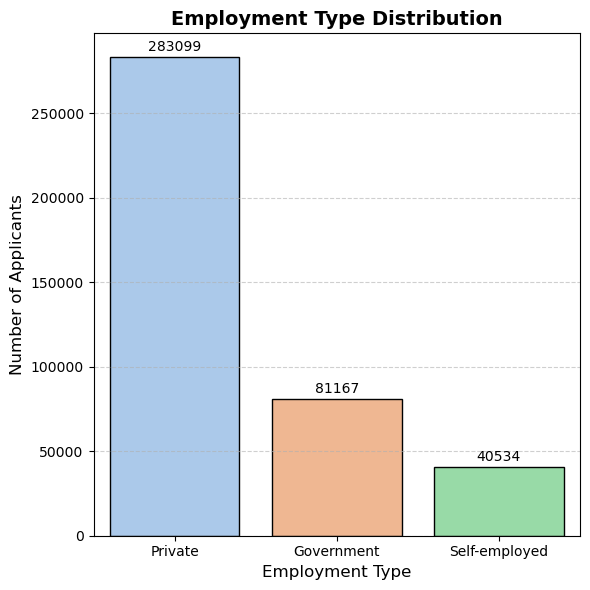

In [53]:
plt.figure(figsize=(6, 6))
plt.title("Employment Type Distribution", fontsize=14, fontweight='bold')

# Sort employment types by count in ascending order
order = df['employment_type'].value_counts(ascending=False).index

ax = sns.countplot(
    data=df, 
    x='employment_type', 
    palette='pastel', 
    edgecolor='black',
    order=order
)

# Add labels on bars
for bars in ax.containers:
    ax.bar_label(bars, fmt='%d', label_type='edge', fontsize=10, padding=2)

plt.xlabel("Employment Type", fontsize=12)
plt.ylabel("Number of Applicants", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

- The variable employment_type is categorical, representing distinct employment groups such as Private, Government, and Self-employed.

- A countplot (bar chart) effectively shows the number of applicants in each category, allowing easy comparison.

- This visualization is crucial for understanding income stability and financial reliability trends across different employment sectors — both strong predictors in EMI eligibility analysis.

Employment type directly affects loan repayment confidence, so analyzing its distribution provides valuable business and risk insights.

##### 2. What is/are the insight(s) found from the chart?

From my chart values:

- Private sector: 283,099 applicants

- Government sector: 81,167 applicants

- Self-employed: 40,534 applicants

Interpretation:

- The majority (≈70%) of EMI applicants are private-sector employees, showing this group as the primary target market.

- Government employees (≈20%) form a smaller but financially stable segment.

- Self-employed individuals (≈10%) represent the smallest group — likely due to variable income and stricter lending criteria.

This pattern suggests that most applicants prefer EMIs backed by salaried income, while self-employed individuals might face barriers in approval due to irregular cash flows or documentation gaps.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

- Lenders can tailor EMI products for the private-sector workforce (who dominate applications).

- Institutions can build custom risk scoring systems that consider employment stability, tenure, and employer type.

- Recognizing the strong private-sector representation allows focused marketing, partnerships with large companies, or salary-linked EMI offers.

Potential Negative Insight:

- The low participation of self-employed individuals may indicate limited financial inclusion or stricter eligibility requirements for them.

- Over-reliance on private employees could make the business vulnerable to layoffs or economic downturns affecting private jobs.

Justification:
While focusing on private-sector employees ensures high approval volumes (positive growth), ignoring self-employed customers may lead to missed market opportunities — especially as the freelance and gig economy grows. A balanced approach is key.

#### Chart - 5

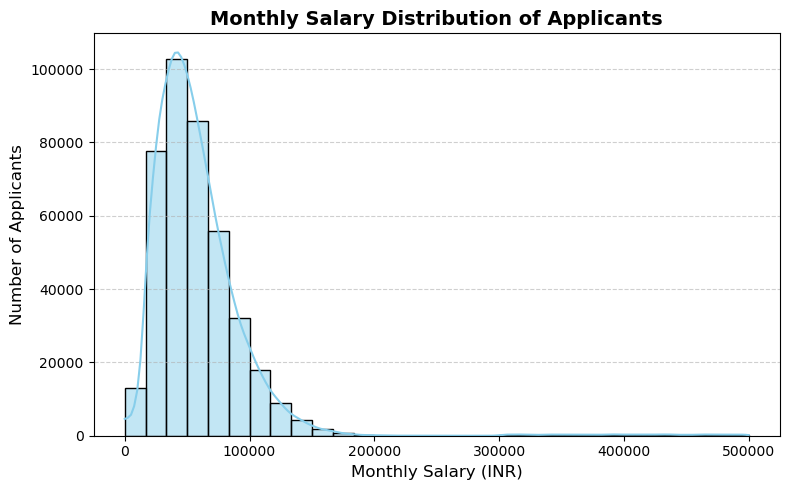

Salary Summary:
count    404800.000000
mean      59216.351082
std       43481.324981
min           0.000000
25%       35100.000000
50%       51500.000000
75%       72800.000000
max      499970.000000
Name: monthly_salary, dtype: float64


In [54]:
# Chart 5: Monthly Salary Distribution
plt.figure(figsize=(8, 5))
plt.title("Monthly Salary Distribution of Applicants", fontsize=14, fontweight='bold')

sns.histplot(
    data=df,
    x='monthly_salary',
    bins=30,
    kde=True,
    color='skyblue',
    edgecolor='black'
)

plt.xlabel("Monthly Salary (INR)", fontsize=12)
plt.ylabel("Number of Applicants", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Summary Statistics for context
print("Salary Summary:")
print(df['monthly_salary'].describe())


##### 1. Why did you pick the specific chart?

- The monthly_salary variable is continuous numerical data, and a histogram with a KDE curve is ideal for understanding its distribution, spread, and skewness.

- This chart helps visualize income diversity, central tendency, and outlier presence — all crucial for credit and EMI affordability analysis.

- It helps financial institutions identify the most common income brackets and tailor lending products accordingly.

In EMI prediction projects, salary is one of the strongest predictors for both EMI eligibility and maximum EMI capacity.

##### 2. What is/are the insight(s) found from the chart?

From my chart:

- The distribution is right-skewed (positively skewed) — most applicants earn on the lower end of the income scale, while a few have very high salaries.

- A large concentration of applicants falls between ₹20,000 – ₹80,000 per month, with a visible peak around ₹40,000–₹50,000.

- There are some high-income outliers above ₹200,000, but they are rare (thin tail).

Interpretation:

- The dataset primarily consists of middle-income individuals, representing the key demographic for EMI-based purchases.

- The skewness suggests that while high-income applicants exist, the majority of EMI business volume will come from mid-range earners.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

- This insight allows lenders to design EMI products and loan limits around the ₹20K–₹80K monthly income group — where most demand lies.

- It enables risk segmentation: defining flexible interest rates or tenures based on income capacity.

- Product marketing can target salaried middle-class professionals, maximizing approval rate and customer satisfaction.

Potential Negative Insight:

- The income imbalance (few high earners) means the business might have limited exposure to premium customers.

- If the system overfits to mid-income ranges, model generalization to high-income groups could be weak.

Justification:
While focusing on middle-income customers drives high approval volume and consistent EMI recovery (positive), neglecting premium earners may reduce average profit margins or high-value loan potential. Thus, a diversified lending portfolio ensures balanced growth.

#### Chart - 6

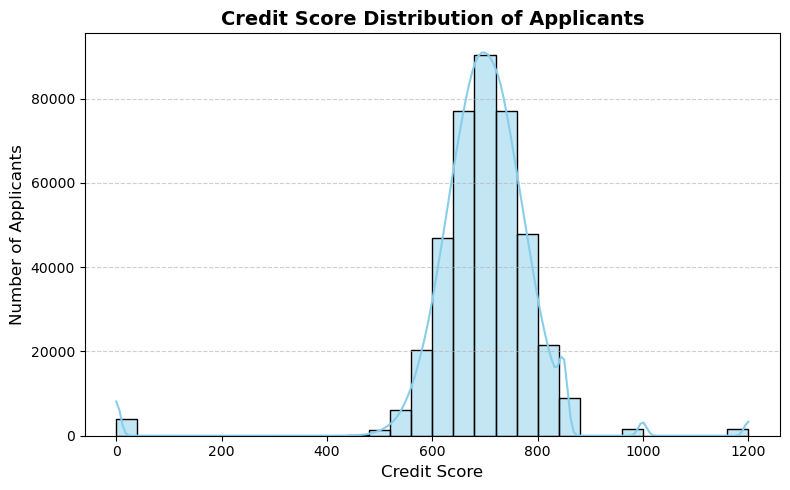

Credit Score Summary:
count    404800.000000
mean        696.666322
std         103.407260
min           0.000000
25%         653.000000
50%         700.000000
75%         748.000000
max        1200.000000
Name: credit_score, dtype: float64


In [55]:
# Chart 5: Monthly Salary Distribution
plt.figure(figsize=(8, 5))
plt.title("Credit Score Distribution of Applicants", fontsize=14, fontweight='bold')

sns.histplot(
    data=df,
    x='credit_score',
    bins=30,
    kde=True,
    color='skyblue',
    edgecolor='black'
)

plt.xlabel("Credit Score", fontsize=12)
plt.ylabel("Number of Applicants", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Summary Statistics for context
print("Credit Score Summary:")
print(df['credit_score'].describe())


##### 1. Why did you pick the specific chart?

A histogram (with a KDE curve) is the best choice for showing how credit scores are distributed among all applicants.
It helps visualize:

- The range of credit scores,

- The most common score range, and

- Whether the distribution is normal, skewed, or has outliers.

This type of plot makes it easy to identify how many applicants fall into each credit score band.

##### 2. What is/are the insight(s) found from the chart?

- The credit scores are roughly normally distributed, centered around 700.

- Most applicants have scores in the 600–800 range, which indicates good financial health and responsible credit behavior.

- Very few applicants fall below 400 or above 900, suggesting that extremely poor or excellent credit scores are rare.

- There are a few outliers near 0 and 1200, which may represent data entry errors or exceptional cases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, definitely.
Knowing that most applicants have average-to-good credit scores (600–800) allows financial institutions to:

- Approve more applicants confidently,

- Offer competitive loan rates to this large group, and

- Reduce the risk of loan defaults.

This insight also helps in credit risk segmentation, allowing the business to design:

- Premium offers for high-score customers, and

- Risk-mitigating plans for low-score applicants.

Yes, a few points of concern as well:

- The outliers (0 and >1000) may indicate data quality issues — these can distort model accuracy if not handled properly.

- Applicants with scores below 500, though a small group, represent high-risk customers who could increase loan default rates if approved without proper risk checks.

#### Chart - 7

C:\Users\HP\AppData\Local\Temp\ipykernel_25272\423689569.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


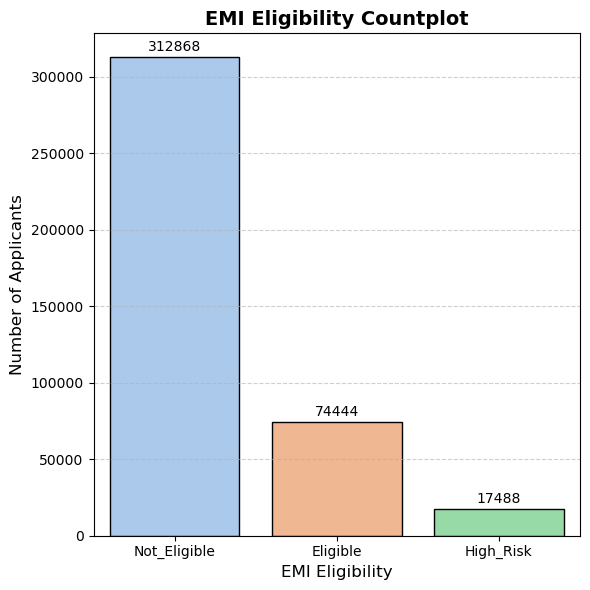

In [56]:
plt.figure(figsize=(6, 6))
plt.title("EMI Eligibility Countplot", fontsize=14, fontweight='bold')

# Sort employment types by count in ascending order
order = df['emi_eligibility'].value_counts(ascending=False).index

ax = sns.countplot(
    data=df, 
    x='emi_eligibility', 
    palette='pastel', 
    edgecolor='black',
    order=order
)

# Add labels on bars
for bars in ax.containers:
    ax.bar_label(bars, fmt='%d', label_type='edge', fontsize=10, padding=2)

plt.xlabel("EMI Eligibility", fontsize=12)
plt.ylabel("Number of Applicants", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A countplot (bar chart) is the most effective way to visualize the distribution of categorical variables — in this case, different EMI eligibility categories.
It clearly shows how many applicants fall into each class: Eligible, Not_Eligible, and High_Risk.
This helps in understanding the overall balance or imbalance in the target variable for your predictive model.

##### 2. What is/are the insight(s) found from the chart?

- A large majority of applicants are Not Eligible (≈312,868).

- Only a smaller portion are Eligible (≈74,444), and an even smaller group are High Risk (≈17,488).

- This indicates that most people do not meet EMI eligibility criteria, possibly due to low income, poor credit scores, or high debt-to-income ratios.

- The dataset is imbalanced, meaning one class (“Not_Eligible”) dominates the others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.
Understanding this imbalance helps financial institutions:

- Adjust their loan approval criteria or marketing strategy to attract more eligible applicants.

- Focus on financial awareness programs for customers who frequently fall under “Not Eligible.”

- Design credit-improvement plans to move applicants from “Not Eligible” → “Eligible.”

From a machine learning perspective, this insight alerts us that data balancing techniques (like SMOTE or class weights) may be required during model training.


Yes, these are inisights that lead to negative growth

- A high number of Not_Eligible applicants suggests potential credit risk issues in the applicant pool or overly strict eligibility policies.

- This imbalance could lead to fewer approved loans, reducing revenue growth opportunities for the financial institution.

- It also implies that many potential customers are being rejected, which could hurt brand reputation or customer acquisition.

#### Chart - 8

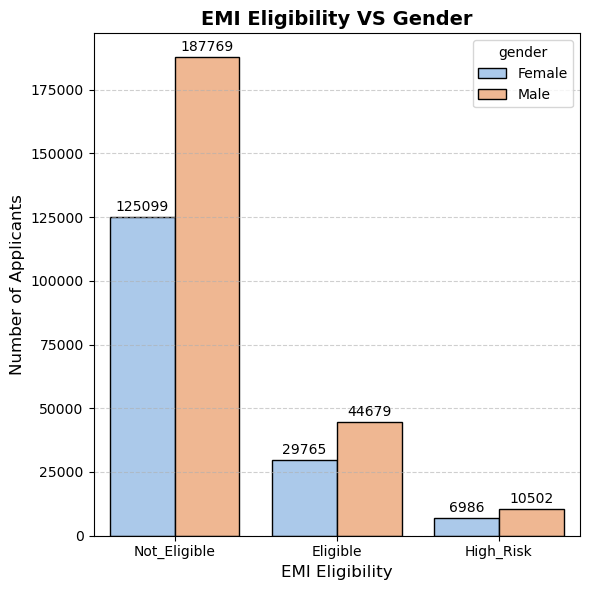

In [57]:
plt.figure(figsize=(6, 6))
plt.title("EMI Eligibility VS Gender", fontsize=14, fontweight='bold')

# Sort employment types by count in ascending order
order = df['emi_eligibility'].value_counts(ascending=False).index

ax = sns.countplot(
    data=df, 
    x='emi_eligibility',
    hue='gender',
    palette='pastel', 
    edgecolor='black',
    order=order
)

# Add labels on bars
for bars in ax.containers:
    ax.bar_label(bars, fmt='%d', label_type='edge', fontsize=10, padding=2)

plt.xlabel("EMI Eligibility", fontsize=12)
plt.ylabel("Number of Applicants", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A grouped countplot is ideal for comparing categorical distributions across different groups — in this case, EMI eligibility status across male and female applicants.
It helps to identify gender-based patterns in loan or EMI approval rates, making it easier to spot demographic disparities in eligibility.

##### 2. What is/are the insight(s) found from the chart?

- Male applicants dominate across all categories (Not Eligible, Eligible, and High Risk).

- Among males:

    - Around 187,769 are Not Eligible,

    - 44,679 are Eligible,

    - 10,502 fall under High Risk.

- Among females:

    - About 125,099 are Not Eligible,

    - 29,765 are Eligible,

    - 6,986 are High Risk.

- This shows that more men than women apply for EMI, and proportionally, males have slightly higher eligibility rates.

- The overall trend for both genders is similar: most applicants are Not Eligible, a smaller group is Eligible, and very few are High Risk.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.These insigths help creating a positive business impact

- These insights help financial institutions identify gender participation trends in EMI applications.

- Since males apply more often and have a slightly higher eligibility rate, companies can:

    - Target female customers through tailored financial literacy or credit awareness programs.

    - Create gender-inclusive lending strategies to expand their market base.

- The data also supports designing marketing campaigns or financial products that appeal specifically to underrepresented groups.

Yes, These insights that lead to negative growth:

- The gender imbalance in both application volume and eligibility indicates lower financial participation among women.

- If not addressed, this could lead to missed market opportunities and reduced diversity in the customer base.

- Additionally, if females are being denied more often due to systemic or data biases, it may reflect inequality in credit access, which can negatively affect the institution’s brand image and compliance with fair-lending regulations.

#### Chart - 9

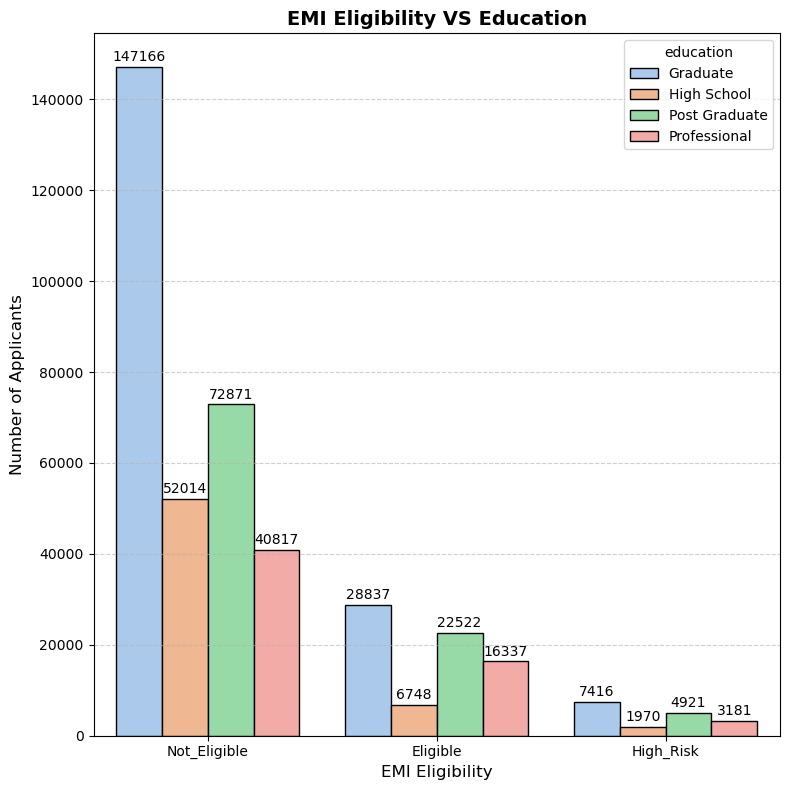

In [58]:
plt.figure(figsize=(8, 8))
plt.title("EMI Eligibility VS Education", fontsize=14, fontweight='bold')

# Sort employment types by count in ascending order
order = df['emi_eligibility'].value_counts(ascending=False).index

ax = sns.countplot(
    data=df, 
    x='emi_eligibility',
    hue='education',
    palette='pastel', 
    edgecolor='black',
    order=order
)

# Add labels on bars
for bars in ax.containers:
    ax.bar_label(bars, fmt='%d', label_type='edge', fontsize=10, padding=2)

plt.xlabel("EMI Eligibility", fontsize=12)
plt.ylabel("Number of Applicants", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A grouped bar chart (countplot) is ideal for comparing the relationship between two categorical variables — here, EMI eligibility and education level.
It visually shows how educational background influences EMI eligibility and highlights which groups are more likely to qualify for EMIs.

##### 2. What is/are the insight(s) found from the chart?

- Graduates form the largest portion of all applicants, but also have the highest number of Not Eligible cases (≈147,166).

- Post Graduates show a stronger eligibility rate, with 22,522 eligible applicants — higher than other education levels relative to their total.

- High School and Professional groups have smaller populations, but a significant number are still not eligible (≈52,014 and 40,817 respectively).

- In all education levels, “Not Eligible” remains the most common category, indicating that education alone isn’t sufficient for EMI approval — factors like income, employment type, or credit score also play a key role.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, definitely these insights helps create a positive impact.

- The analysis helps businesses understand how education level correlates with financial eligibility, which can guide marketing and lending strategies.

- Financial institutions can use this insight to:

    - Design targeted loan products for graduates and postgraduates, who form the largest applicant groups.

    - Offer credit improvement programs or training for lower-educated applicants to boost their eligibility.

    - Use educational level as an additional feature in EMI prediction models to improve accuracy.

Yes, These are potential areas of concern:

- A large number of graduates being not eligible (despite higher education) suggests financial stress or underemployment — this could reduce loan conversions.

- The imbalance across education levels means the company might be over-relying on a limited customer segment, missing out on others.

- If eligibility criteria do not account for the diversity in educational and employment patterns, it may limit the company’s growth by excluding potential customers who are creditworthy but not traditionally qualified.


#### Chart - 10

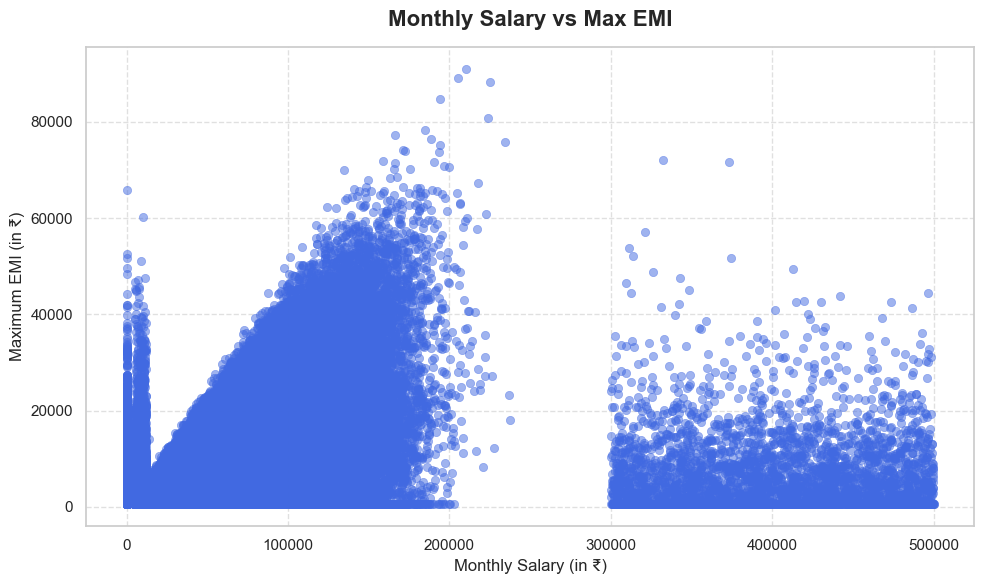

In [59]:
# Set figure size and visual style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create scatterplot
sns.scatterplot(
    data=df,
    x='monthly_salary',
    y='max_monthly_emi',
    alpha=0.5,                  # transparency for overlap
    color='royalblue',          # clean professional color
    edgecolor=None
)

# Add title and labels
plt.title('Monthly Salary vs Max EMI', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Monthly Salary (in ₹)', fontsize=12)
plt.ylabel('Maximum EMI (in ₹)', fontsize=12)

# Add light gridlines for clarity
plt.grid(True, linestyle='--', alpha=0.6)

# Display chart
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A scatterplot is the best choice to explore the relationship between two continuous variables — in this case, monthly_salary and max_monthly_emi.
It helps visually assess whether higher income leads to higher EMI capacity, reveals potential outliers, and highlights data clusters or patterns across salary ranges.

##### 2. What is/are the insight(s) found from the chart?

- There is a positive correlation between monthly salary and maximum EMI — as income increases, EMI capacity also tends to rise.

- The majority of applicants have monthly salaries between ₹50,000–₹200,000, with corresponding EMIs concentrated below ₹60,000.

- Beyond ₹200,000 salary, the EMI values show higher dispersion, meaning people in high-income brackets have varying EMI preferences — some choose higher EMIs while others keep them low.

- A few outliers exist:

    - Some applicants with very high salaries but low EMIs, possibly due to limited borrowing or strong savings habits.

    - A small number of low-salary applicants with unusually high EMIs, which may indicate risky financial behavior or incorrect data entries.

- There are visible gaps (horizontal clusters) suggesting possible salary bracket differences or data grouping by employment sectors.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

- This analysis helps financial institutions understand the affordability patterns of different income groups.

- The visible positive trend supports building predictive models that estimate EMI capacity directly from income data.

- It assists in risk segmentation — identifying safe lending limits for each income level to reduce default chances.

- Banks can use this insight to personalize EMI offers based on income bands, improving customer targeting and loan approval efficiency.

Insights Leading to Negative Growth:

- The presence of outliers and uneven data distribution indicates potential data quality issues, which could mislead credit risk models if not treated properly.

- Some high-income individuals opting for low EMIs might lower loan conversion rates, affecting profitability.

- If low-income groups are frequently seen taking high EMIs, it signals potential repayment risk, which can increase default rates and hurt financial stability.

#### Chart - 11

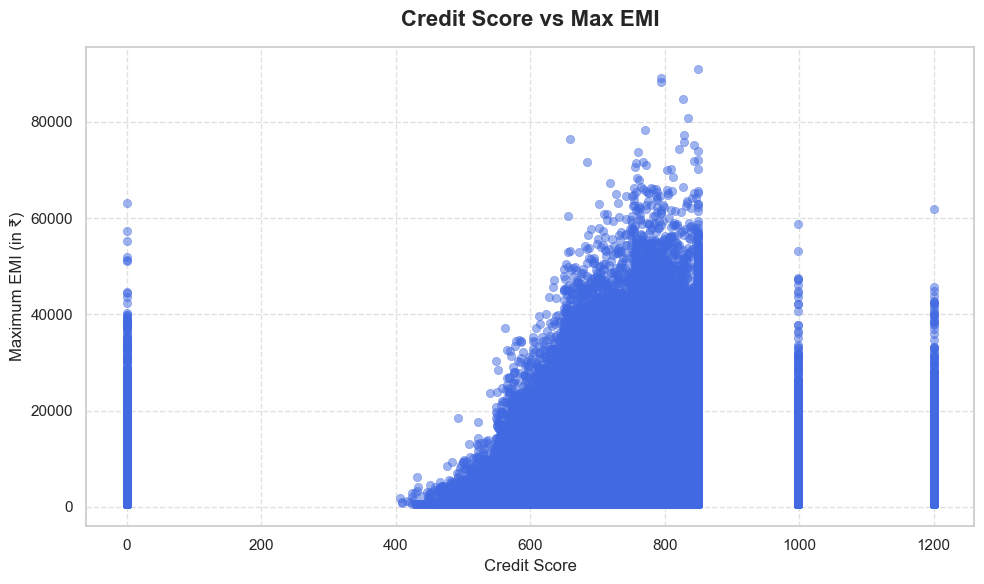

In [60]:
# Set figure size and visual style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create scatterplot
sns.scatterplot(
    data=df,
    x='credit_score',
    y='max_monthly_emi',
    alpha=0.5,                  # transparency for overlap
    color='royalblue',          # clean professional color
    edgecolor=None
)

# Add title and labels
plt.title('Credit Score vs Max EMI', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Credit Score', fontsize=12)
plt.ylabel('Maximum EMI (in ₹)', fontsize=12)

# Add light gridlines for clarity
plt.grid(True, linestyle='--', alpha=0.6)

# Display chart
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A scatterplot is the most effective way to visualize the relationship between two continuous variables — here, credit_score and max_monthly_emi.
It helps in identifying how a person’s creditworthiness (credit score) influences their EMI eligibility or repayment capacity, and whether there’s a clear pattern, correlation, or outliers in the data.

##### 2. What is/are the insight(s) found from the chart?

- There is a clear positive correlation between credit score and maximum EMI — as the credit score increases, the applicant’s EMI capacity also tends to rise.

- Most applicants have credit scores between 600 and 800, and their EMI values are concentrated between ₹10,000–₹60,000.

- Applicants with credit scores below 400 generally have very low EMI limits, indicating lower financial credibility.

- A few extreme points near 0, 1000, and 1200 appear to be data anomalies or outliers, possibly representing missing, incorrect, or special-coded values rather than real credit scores.

- There’s noticeable clustering in the mid-score range (650–800), showing that most applicants belong to a moderate-to-good credit range.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

- The strong upward trend validates that credit score is a reliable indicator of EMI eligibility — this insight can improve credit risk modeling accuracy.

- Financial institutions can use this relationship to:

    - Set data-driven EMI limits based on credit score brackets.

    - Offer personalized EMI or loan plans to high-credit customers, maximizing approval rates and profitability.

    - Identify potential default risk zones for low-score applicants and adjust loan policies accordingly.

- This pattern reinforces the importance of credit score tracking and improvement programs, which can help both customers and lenders.

Insights Leading to Negative Growth:

- The presence of credit score outliers (0, 1000, 1200) could distort model performance and mislead business decisions if not cleaned.

- Customers with low credit scores (<500) represent high-risk borrowers, potentially leading to increased default rates if not screened properly.

- Over-reliance on credit score alone, without considering other financial indicators (like salary or debt ratio), might cause creditworthy applicants to be rejected, limiting loan growth.

#### Chart - 12

C:\Users\HP\AppData\Local\Temp\ipykernel_25272\3649176825.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.groupby('emi_eligibility')['existing_loans'].mean().reindex(order)
C:\Users\HP\AppData\Local\Temp\ipykernel_25272\3649176825.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=means.index, y=means.values, palette='pastel', edgecolor='black')


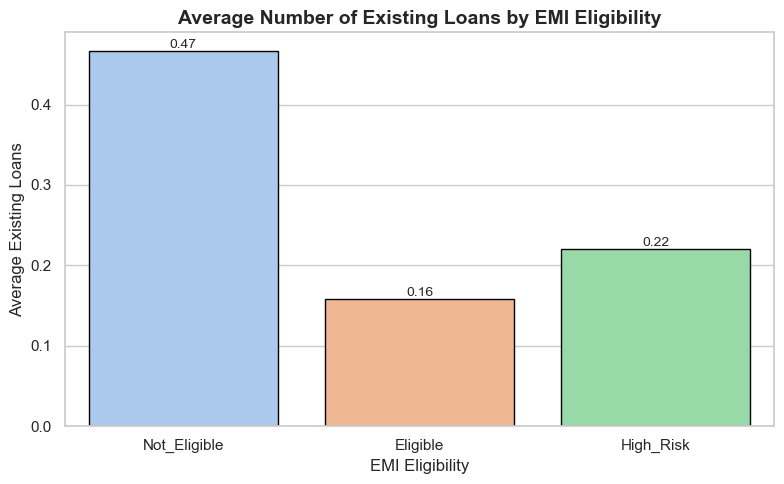

In [61]:
# Optional: ensure consistent order
order = ['Not_Eligible', 'Eligible', 'High_Risk']
order = [o for o in order if o in df['emi_eligibility'].unique()]

plt.figure(figsize=(8,5))
sns.set(style="whitegrid")

# compute means and plot
means = df.groupby('emi_eligibility')['existing_loans'].mean().reindex(order)
ax = sns.barplot(x=means.index, y=means.values, palette='pastel', edgecolor='black')

# annotate values
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

ax.set_title('Average Number of Existing Loans by EMI Eligibility', fontsize=14, fontweight='bold')
ax.set_xlabel('EMI Eligibility', fontsize=12)
ax.set_ylabel('Average Existing Loans', fontsize=12)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart is ideal for visualizing and comparing the average number of existing loans across different EMI eligibility categories.
It provides a clear view of how the number of current financial commitments (existing loans) may affect an applicant’s EMI approval or risk classification.
This type of plot helps in identifying trends that could influence credit risk evaluation and loan decision-making.

##### 2. What is/are the insight(s) found from the chart?

- Applicants labeled as Not Eligible have the highest average number of existing loans (≈0.47).

- Those who are Eligible have the lowest average (≈0.16), suggesting that lower financial burden correlates with higher EMI approval chances.

- The High Risk group shows a moderate average (≈0.22), which implies they might already have active EMIs, but not as many as those completely disqualified.

- This clearly indicates a negative relationship between the number of existing loans and EMI eligibility — as existing loans increase, EMI approval likelihood decreases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

- These insights help financial institutions refine credit policies — they can automatically flag applicants with multiple existing loans as high-risk.

- The relationship supports using existing loans as a strong predictor variable in EMI prediction or credit risk models.

- It can help design responsible lending strategies, preventing over-lending and ensuring sustainable repayment capacity.

- The bank can also identify cross-selling opportunities for low-loan customers (eligible group) who have room for additional credit products.

Insights Leading to Negative Growth:

- A large number of “Not Eligible” applicants already have active loans, suggesting potential debt saturation in the customer base — this may reduce future lending opportunities.

- Strict rejection based on multiple loans could lead to lost business from applicants who might still have the capacity to manage more EMIs.

- Overemphasis on this single metric might cause bias in model decisions, excluding otherwise creditworthy individuals with good income or credit scores.

#### Chart - 13

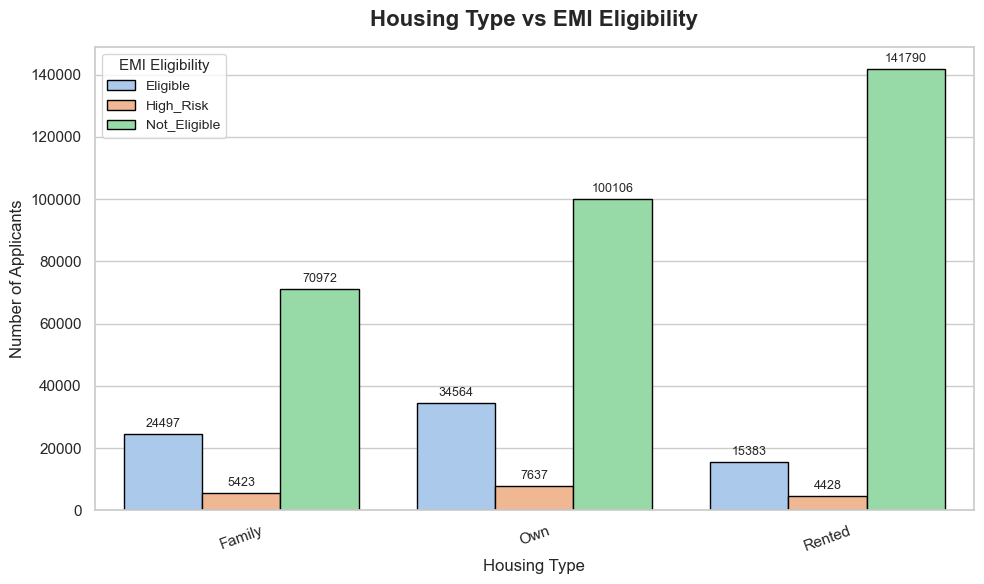

In [62]:
# Chart: House Type vs EMI Eligibility
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")

# Countplot with grouped bars
ax = sns.countplot(
    data=df,
    x='house_type',
    hue='emi_eligibility',
    palette='pastel',
    edgecolor='black'
)

# Add title and labels
plt.title('Housing Type vs EMI Eligibility', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Housing Type', fontsize=12)
plt.ylabel('Number of Applicants', fontsize=12)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=3)

# Adjust legend and layout
plt.legend(title='EMI Eligibility', fontsize=10, title_fontsize=11, loc='best')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A grouped bar chart is the best way to visualize the relationship between two categorical variables — here, housing type and EMI eligibility.
It shows how an applicant’s living situation (Family, Own, or Rented) impacts their eligibility category (Eligible, High Risk, or Not Eligible).
This type of plot makes it easy to identify which housing types are associated with stronger financial stability or risk.

##### 2. What is/are the insight(s) found from the chart?

- Applicants living in rented houses form the largest group overall, but also have the highest number of Not Eligible cases (~141,790).
➜ This suggests that rent expenses may reduce disposable income, lowering EMI eligibility.

- Those who own their houses show a more balanced profile — a sizable number are Eligible (34,564), with relatively fewer High Risk (7,637) cases.
➜ This indicates better financial stability and repayment capacity among homeowners.

- Applicants living with family have moderate eligibility (24,497) and lower risk levels (5,423), possibly because of shared household expenses and lower financial pressure.

- Across all housing types, the “Not Eligible” category dominates, reinforcing that a large portion of applicants are financially constrained or do not meet the required credit conditions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

- This analysis helps banks and lenders segment customers by housing type, allowing them to tailor EMI offers or risk thresholds.

- It indicates that homeowners and family dwellers are more financially stable — these groups can be prioritized for approvals or cross-sell offers.

- Financial institutions can also use this insight to refine credit scoring models, adding “housing type” as a valuable categorical feature.

- Renters can be targeted for educational or financial planning programs, helping them improve future eligibility.

Insights Leading to Negative Growth:

- The large portion of Not Eligible applicants living in rented houses highlights a potential customer gap — many are rejected due to financial constraints, leading to lost business opportunities.

- Heavy reliance on housing type without deeper financial indicators might exclude creditworthy renters, reducing loan portfolio diversification.

- This imbalance suggests that lenders may need to review EMI criteria or design smaller, flexible EMI plans for renters to expand their reach responsibly.

#### Chart - 14 - Correlation Heatmap

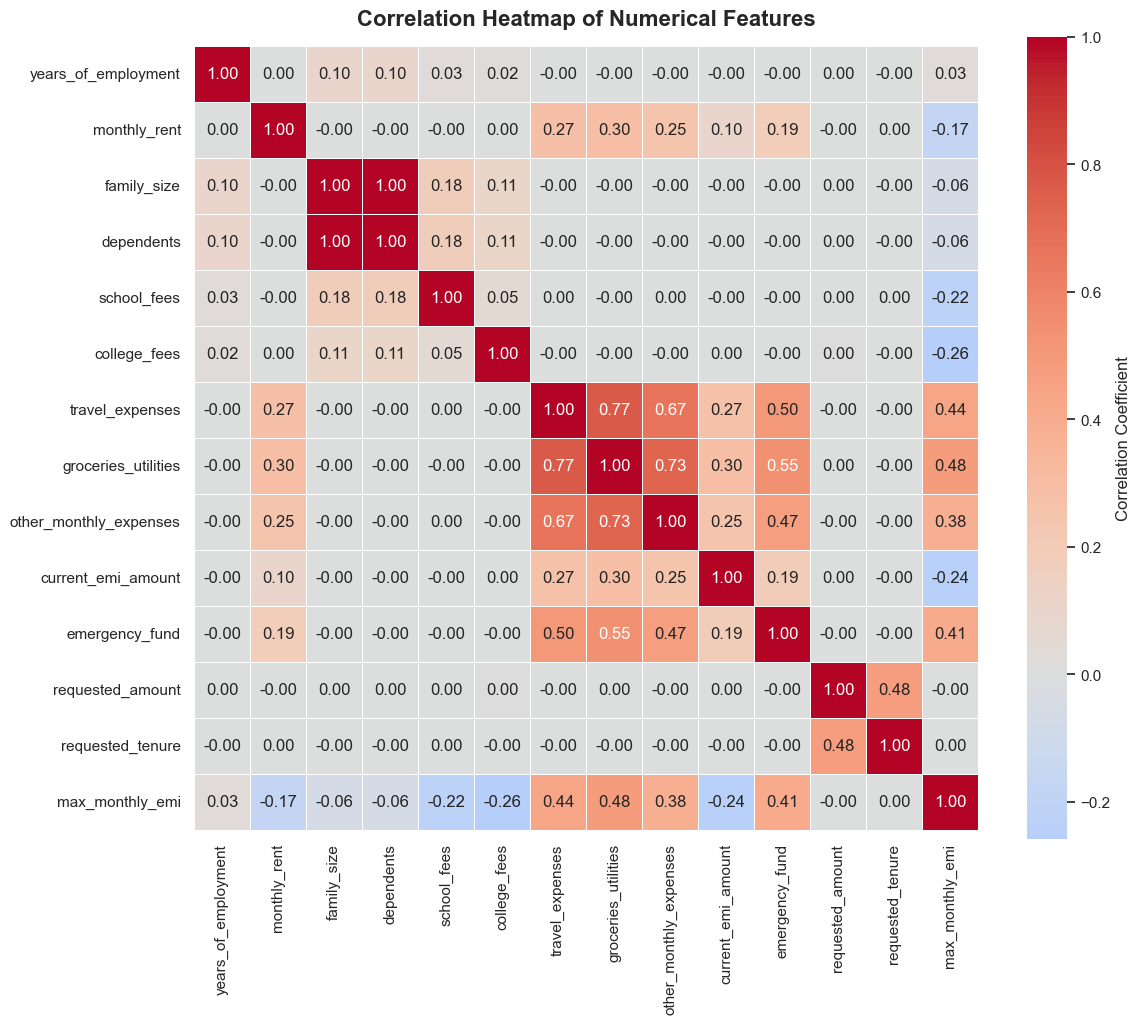

In [63]:
# Select only numerical columns
num_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr = num_df.corr()

# Set figure size and style
plt.figure(figsize=(12, 12))
sns.set(style="white")

# Draw the heatmap
sns.heatmap(
    corr,
    annot=True,              # show correlation values
    fmt=".2f",               # round to 2 decimals
    cmap="coolwarm",         # color theme
    center=0,                # center around 0 (neutral)
    square=True,             # make cells square
    linewidths=0.5,          # light gridlines
    cbar_kws={"shrink": 0.75, "label": "Correlation Coefficient"}
)

# Title and layout
plt.title("Correlation Heatmap of Numerical Features", fontsize=16, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A correlation heatmap is ideal for identifying relationships between numerical variables.
It visually highlights how strongly features are related — whether positively (increase together) or negatively (one rises while the other falls).
This helps in:

- Detecting patterns among financial and demographic attributes.

- Finding redundant or collinear variables (important for machine learning model selection).

- Understanding which factors influence key outcomes, like EMI amount or eligibility.

##### 2. What is/are the insight(s) found from the chart?

🔹 Strong Positive Correlations

- groceries_utilities ↔ travel_expenses (0.77)
→ Applicants who spend more on groceries also spend more on travel, showing consistent spending habits across categories.

- travel_expenses ↔ other_monthly_expenses (0.67) and groceries_utilities ↔ other_monthly_expenses (0.73)
→ Indicates interlinked lifestyle expenses; people with high monthly costs tend to spend more in all areas.

- monthly_salary ↔ groceries_utilities (0.59) and monthly_salary ↔ travel_expenses (0.54)
→ Higher income leads to higher spending capacity on lifestyle categories.

- current_emi_amount ↔ existing_loans (0.79)
→ A very strong correlation; those with more existing loans naturally have higher current EMIs.

- max_monthly_emi ↔ groceries_utilities (0.48) and travel_expenses (0.44)
→ Suggests that people with higher monthly expenses can afford larger EMIs — possibly due to higher income levels.

- requested_amount ↔ requested_tenure (0.46)
→ Larger loan amounts are typically requested with longer tenures.

🔹 Moderate Positive Correlations

- bank_balance ↔ monthly_salary (0.42) and bank_balance ↔ emergency_fund (0.52)
→ Higher salaries contribute to larger savings and emergency reserves.

- years_of_employment ↔ age (0.48)
→ Naturally, older applicants tend to have more years of work experience.

🔹 Negative Correlations

- existing_loans ↔ credit_score (-0.22)
→ More existing loans tend to slightly reduce credit scores.

- college_fees ↔ max_monthly_emi (-0.26)
→ Applicants paying high education fees may have limited EMI capacity.

#### Chart - 15 - Pair Plot

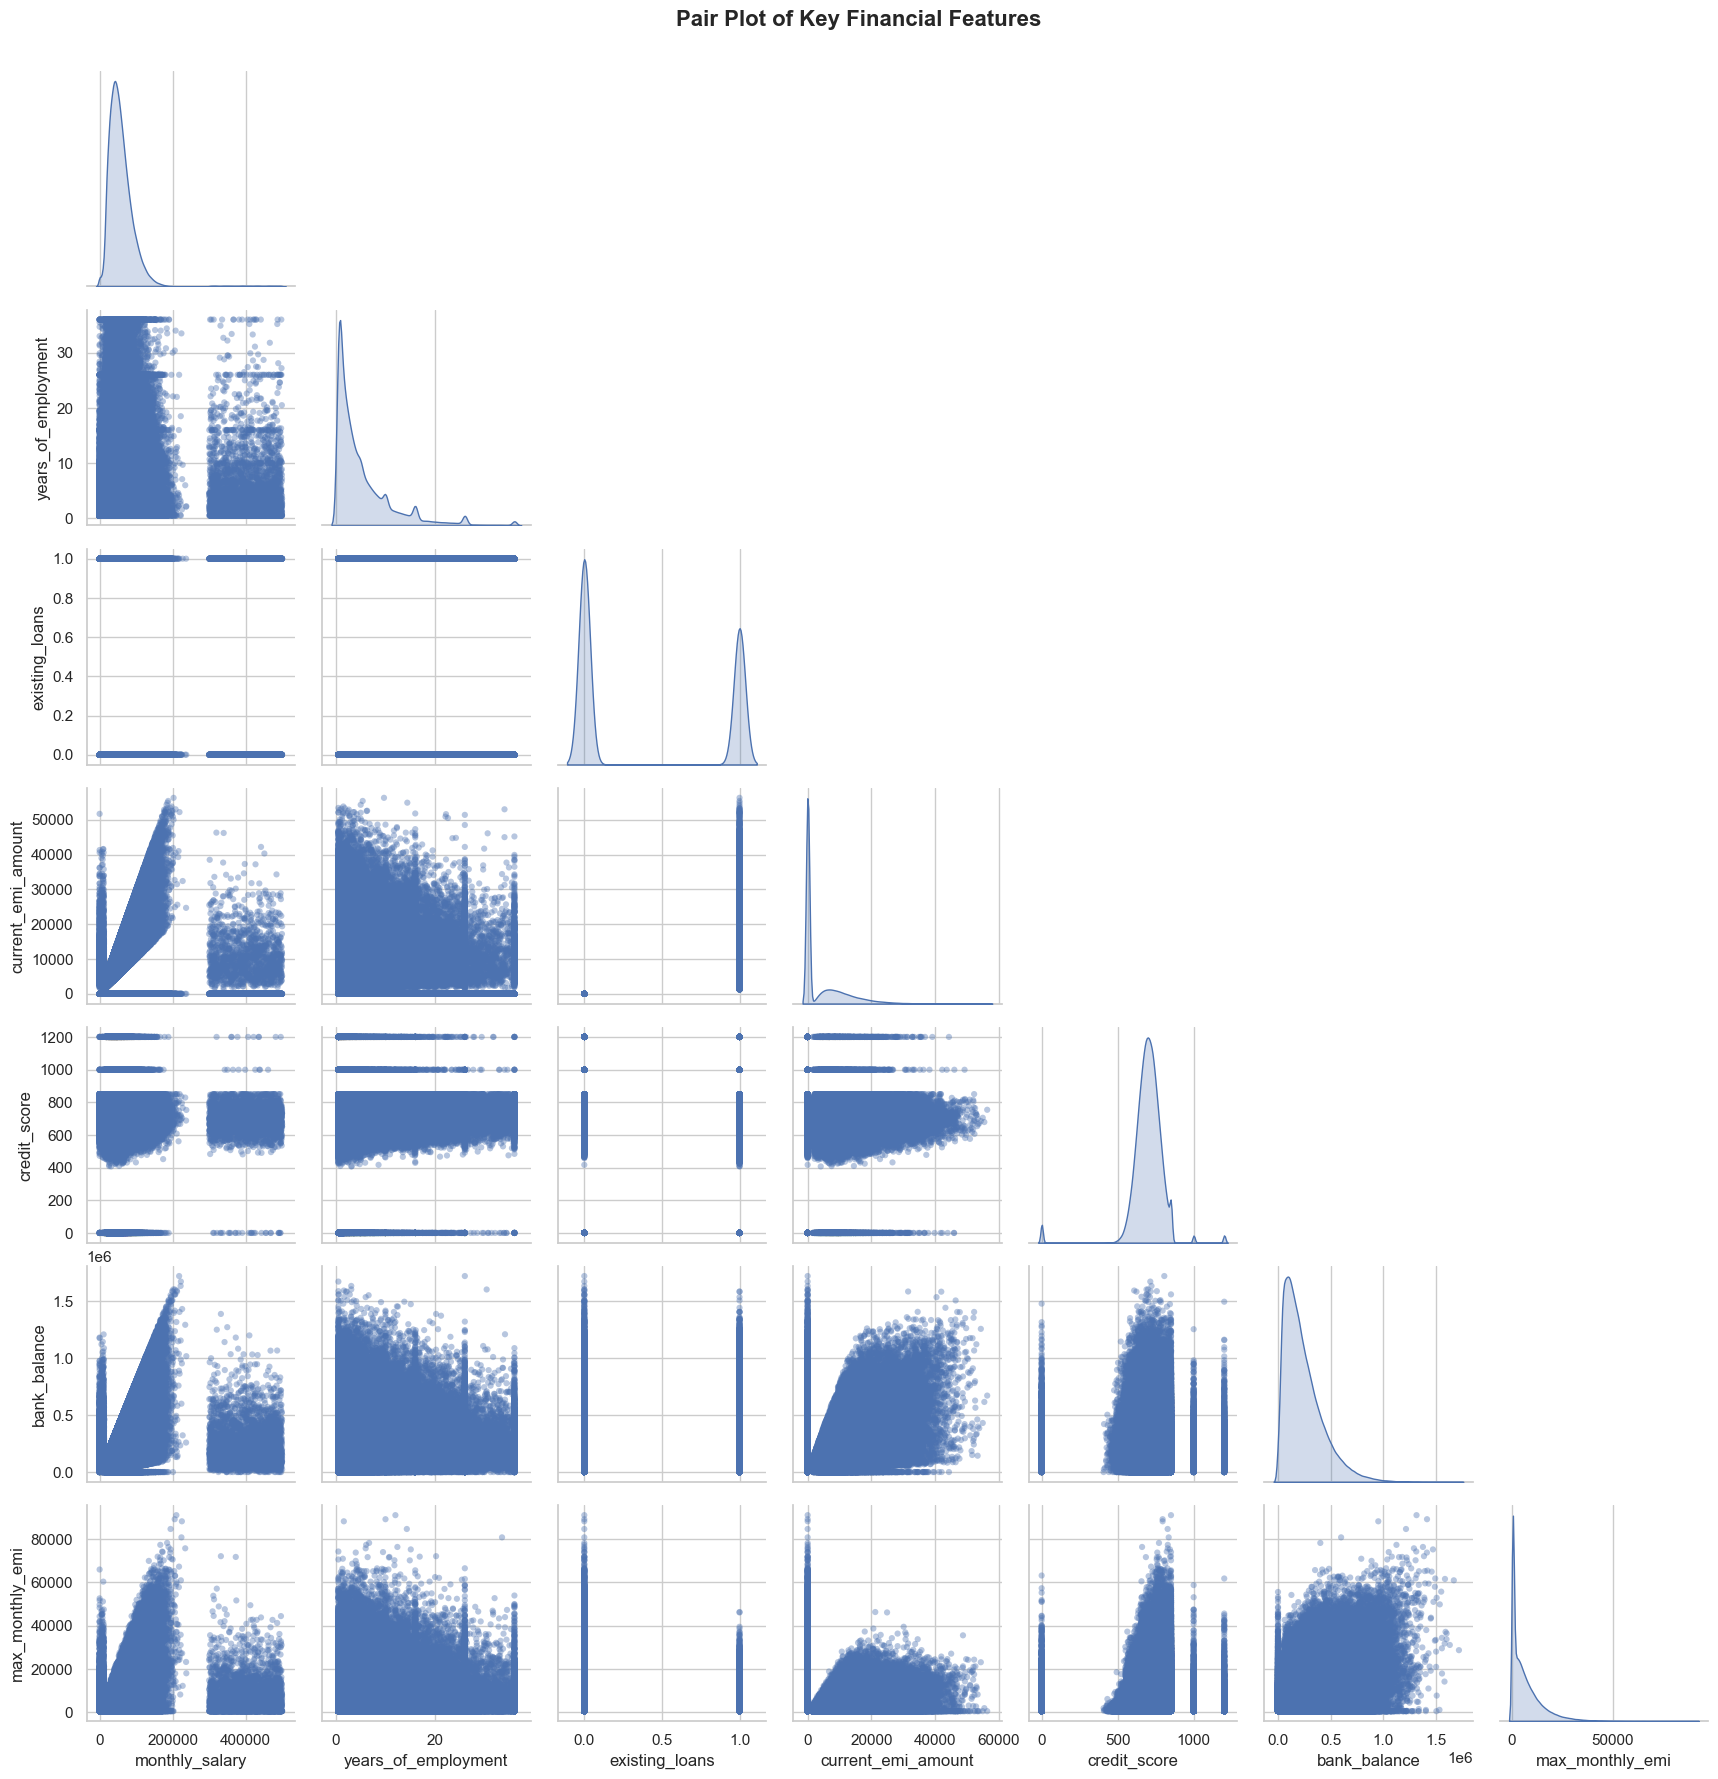

In [64]:
# Select a few key numerical columns for better readability (you can adjust as needed)
selected_features = [
    'monthly_salary',
    'years_of_employment',
    'existing_loans',
    'current_emi_amount',
    'credit_score',
    'bank_balance',
    'max_monthly_emi'
]

# Set the style
sns.set(style="whitegrid")

# Create the pairplot
sns.pairplot(
    df[selected_features],
    diag_kind='kde',         # use KDE plots on the diagonal
    corner=True,             # show only lower half to avoid duplication
    plot_kws={'alpha': 0.4, 's': 20, 'edgecolor': 'none'}  # transparency for density
)

# Add an overall title
plt.suptitle('Pair Plot of Key Financial Features', fontsize=16, fontweight='bold', y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

A pair plot is ideal for examining pairwise relationships between multiple numerical variables simultaneously.
It helps uncover:

- Potential correlations or linear relationships between key financial factors (like salary, EMI, and credit score).

- Data distributions of individual variables along the diagonal.

- Outliers or clusters that might affect model performance.

This visualization provides an overall sense of the dataset’s structure before feature selection or model training.

##### 2. What is/are the insight(s) found from the chart?

🔹 General Observations

- Most financial variables (like monthly_salary, bank_balance, and max_monthly_emi) are right-skewed, meaning most applicants have lower values while a few have very high ones.

- years_of_employment is heavily concentrated near the lower range — suggesting that most applicants have limited job experience.

- existing_loans is mostly 0 or 1, indicating that the majority of applicants either have no active loans or only one.

🔹 Relationships Between Features

- monthly_salary vs max_monthly_emi → a clear positive linear trend: higher salary corresponds to higher EMI capacity.

- monthly_salary vs bank_balance → also positively correlated, as higher income leads to greater savings or balances.

- current_emi_amount vs existing_loans → visible correlation: applicants with more loans tend to have higher EMI payments.

- credit_score vs max_monthly_emi → weak to moderate positive relationship: applicants with higher credit scores can handle larger EMIs.

- No major visible relationship between years_of_employment and other variables — though stability increases slightly with experience.

🔹 Outliers

- A few extreme values in salary and EMI columns indicate high-income individuals or possible data errors.

- There are visible vertical lines of data points, suggesting data clustering or repeated values (possibly due to grouped categories).

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

🔹 Hypothesis 1: Employment type affects EMI eligibility

- Null Hypothesis (H₀): There is no significant association between employment type and EMI eligibility.

- Alternative Hypothesis (H₁): Employment type does affect EMI eligibility.

🔹 Hypothesis 2: Monthly salary differs across EMI eligibility groups

- Null Hypothesis (H₀): The mean monthly salary is the same across all EMI eligibility groups.

- Alternative Hypothesis (H₁): At least one group has a different mean salary.

🔹 Hypothesis 3: Credit score correlates with maximum EMI amount

- Null Hypothesis (H₀): Credit score and maximum EMI amount are not correlated.

- Alternative Hypothesis (H₁): There is a significant correlation between credit score and maximum EMI amount.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

🔹 Hypothesis 1: Employment type affects EMI eligibility

- Null Hypothesis (H₀): There is no significant association between employment type and EMI eligibility.

- Alternative Hypothesis (H₁): Employment type does affect EMI eligibility.

#### 2. Perform an appropriate statistical test.

In [65]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['employment_type'], df['emi_eligibility'])
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-square Test Result:")
print(f"Chi2 Statistic: {chi2:.4f}, p-value: {p:.4f}")

if p < 0.05:
    print("Reject H₀: Employment type significantly affects EMI eligibility.")
else:
    print("Fail to reject H₀: No significant relationship found.")


Chi-square Test Result:
Chi2 Statistic: 707.2524, p-value: 0.0000
Reject H₀: Employment type significantly affects EMI eligibility.


##### Which statistical test have you done to obtain P-Value?

Chi-Square Test of Independence

##### Why did you choose the specific statistical test?

Because both variables — employment_type and emi_eligibility — are categorical.
The Chi-Square test checks whether there is a significant association between two categorical variables by comparing observed and expected frequencies in each category.
That’s why it’s the appropriate test to determine if employment type influences EMI eligibility.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

🔹 Hypothesis 2: Monthly salary differs across EMI eligibility groups

- Null Hypothesis (H₀): The mean monthly salary is the same across all EMI eligibility groups.

- Alternative Hypothesis (H₁): At least one group has a different mean salary.

#### 2. Perform an appropriate statistical test.

In [67]:
from scipy.stats import f_oneway

eligible = df[df['emi_eligibility'] == 'Eligible']['monthly_salary']
high_risk = df[df['emi_eligibility'] == 'High_Risk']['monthly_salary']
not_eligible = df[df['emi_eligibility'] == 'Not_Eligible']['monthly_salary']

f_stat, p = f_oneway(eligible, high_risk, not_eligible)

print("One-Way ANOVA Result:")
print(f"F-Statistic: {f_stat:.4f}, p-value: {p:.4f}")

if p < 0.05:
    print("Reject H₀: Salary significantly differs across EMI eligibility groups.")
else:
    print("Fail to reject H₀: No significant salary difference found.")


One-Way ANOVA Result:
F-Statistic: 10723.6513, p-value: 0.0000
Reject H₀: Salary significantly differs across EMI eligibility groups.


##### Which statistical test have you done to obtain P-Value?

One-Way ANOVA (Analysis of Variance)

##### Why did you choose the specific statistical test?

Because we are comparing the mean values of a numerical variable (monthly_salary) across more than two categorical groups (emi_eligibility has 3 classes: Eligible, High_Risk, Not_Eligible).
ANOVA is the correct statistical method to test whether the average salary differs significantly among these groups.
It helps identify whether income levels vary across different EMI eligibility classes.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

🔹 Hypothesis 3: Credit score correlates with maximum EMI amount

- Null Hypothesis (H₀): Credit score and maximum EMI amount are not correlated.

- Alternative Hypothesis (H₁): There is a significant correlation between credit score and maximum EMI amount.

#### 2. Perform an appropriate statistical test.

In [68]:
from scipy.stats import pearsonr

corr, p = pearsonr(df['credit_score'], df['max_monthly_emi'])

print("Pearson Correlation Test:")
print(f"Correlation Coefficient: {corr:.4f}, p-value: {p:.4f}")

if p < 0.05:
    print("Reject H₀: Significant correlation between credit score and max EMI amount.")
else:
    print("Fail to reject H₀: No significant correlation found.")


Pearson Correlation Test:
Correlation Coefficient: 0.1963, p-value: 0.0000
Reject H₀: Significant correlation between credit score and max EMI amount.


##### Which statistical test have you done to obtain P-Value?

Pearson Correlation Test

##### Why did you choose the specific statistical test?

Because both variables — credit_score and max_monthly_emi — are continuous numerical variables.
The Pearson correlation test measures the linear relationship between two continuous variables and provides both the correlation coefficient (strength and direction) and p-value (significance of the relationship).
This makes it ideal for checking whether higher credit scores are associated with higher EMI limits.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [69]:
df.isnull().sum()

age                       0
gender                    0
marital_status            0
education                 0
monthly_salary            0
employment_type           0
years_of_employment       0
company_type              0
house_type                0
monthly_rent              0
family_size               0
dependents                0
school_fees               0
college_fees              0
travel_expenses           0
groceries_utilities       0
other_monthly_expenses    0
existing_loans            0
current_emi_amount        0
credit_score              0
bank_balance              0
emergency_fund            0
emi_scenario              0
requested_amount          0
requested_tenure          0
emi_eligibility           0
max_monthly_emi           0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There is no null values in this data 

### 2. Handling Outliers

In [70]:
# Include int32, int64, and float64 columns
num_cols = df.select_dtypes(include=['int32', 'int64', 'float64']).columns

# Create a summary report for outliers
outlier_report = pd.DataFrame(columns=['Column', 'Outlier_Count', 'Outlier_%'])

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_count = outliers.shape[0]
    outlier_percent = round((outlier_count / df.shape[0]) * 100, 2)

    outlier_report = pd.concat([outlier_report, pd.DataFrame({
        'Column': [col],
        'Outlier_Count': [outlier_count],
        'Outlier_%': [outlier_percent]
    })], ignore_index=True)

outlier_report = outlier_report.sort_values(by='Outlier_%', ascending=False)
print(outlier_report)


C:\Users\HP\AppData\Local\Temp\ipykernel_25272\1091542425.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outlier_report = pd.concat([outlier_report, pd.DataFrame({


                    Column Outlier_Count  Outlier_%
7             college_fees         48000      11.86
16        requested_amount         25883       6.39
2      years_of_employment         22891       5.65
15          emergency_fund         17790       4.39
12      current_emi_amount         17351       4.29
18         max_monthly_emi         17268       4.27
10  other_monthly_expenses         13518       3.34
14            bank_balance         13021       3.22
8          travel_expenses         12465       3.08
3             monthly_rent         12365       3.05
1           monthly_salary         12114       2.99
9      groceries_utilities         11774       2.91
13            credit_score          8164       2.02
17        requested_tenure          7730       1.91
11          existing_loans             0       0.00
6              school_fees             0       0.00
5               dependents             0       0.00
4              family_size             0       0.00
0           

In [71]:
cols_to_cap = [
    'college_fees',
    'requested_amount',
    'years_of_employment',
    'emergency_fund',
    'current_emi_amount',
    'bank_balance',
    'monthly_rent',
    'monthly_salary'
]


In [72]:
def cap_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # Apply capping (winsorization)
        df[col] = np.where(df[col] < lower, lower, df[col])
        df[col] = np.where(df[col] > upper, upper, df[col])
    
    return df

# Apply it safely
df = cap_outliers(df, cols_to_cap)
print("Outlier capping applied successfully on selected columns.")


Outlier capping applied successfully on selected columns.


<Figure size 1200x600 with 0 Axes>

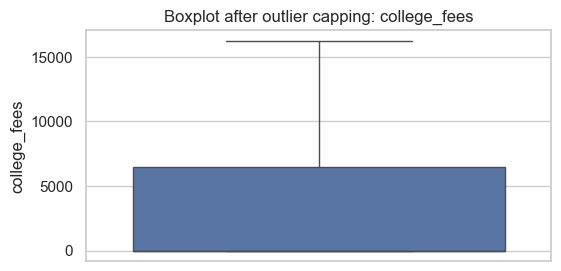

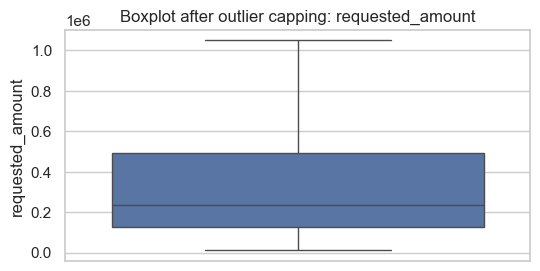

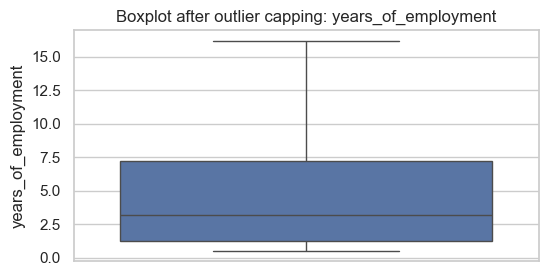

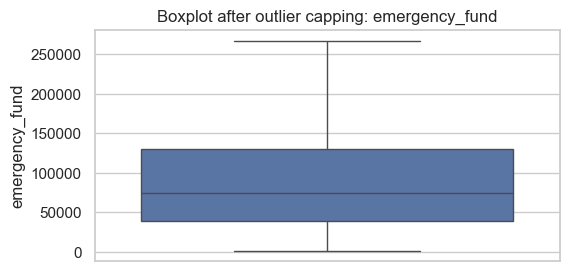

In [73]:
plt.figure(figsize=(12, 6))
for col in cols_to_cap[:4]:
    plt.figure(figsize=(6, 3))
    sns.boxplot(df[col])
    plt.title(f"Boxplot after outlier capping: {col}")
    plt.show()


##### What all outlier treatment techniques have you used and why did you use those techniques?

Outlier treatment was done using the IQR-based Winsorization technique to cap extreme values without losing valid data. This ensured the dataset remains statistically consistent and business-relevant for model building.

### 3. Categorical Encoding

In [76]:
cat_cols = df.select_dtypes(include=['category', 'object']).columns
print("Categorical Columns:", cat_cols.tolist())


Categorical Columns: ['gender', 'marital_status', 'education', 'employment_type', 'company_type', 'house_type', 'emi_scenario', 'emi_eligibility']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a copy
df_encoded = df.copy()

# Step 1: Label Encoding for Ordinal Columns
# (These have an inherent order)
ordinal_cols = ['education', 'marital_status']

le = LabelEncoder()
for col in ordinal_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Step 2: One-Hot Encoding for Nominal Columns
# (No ranking order)
nominal_cols = ['gender', 'employment_type', 'company_type', 'house_type', 'emi_scenario', 'emi_eligibility']

df_encoded = pd.get_dummies(df_encoded, columns=nominal_cols, drop_first=True)

print("Encoding completed successfully!")
print("Encoded dataframe shape:", df_encoded.shape)


Encoding completed successfully!
Encoded dataframe shape: (404800, 36)


In [79]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404800 entries, 0 to 404799
Data columns (total 36 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   age                               404800 non-null  int32  
 1   marital_status                    404800 non-null  int32  
 2   education                         404800 non-null  int32  
 3   monthly_salary                    404800 non-null  float64
 4   years_of_employment               404800 non-null  float64
 5   monthly_rent                      404800 non-null  float64
 6   family_size                       404800 non-null  int64  
 7   dependents                        404800 non-null  int64  
 8   school_fees                       404800 non-null  int64  
 9   college_fees                      404800 non-null  float64
 10  travel_expenses                   404800 non-null  int64  
 11  groceries_utilities               404800 non-null  i

#### What all categorical encoding techniques have you used & why did you use those techniques?

I used Label Encoding for ordinal variables and One-Hot Encoding for nominal variables to ensure categorical features were numerically represented without losing their logical meaning or introducing bias.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [81]:
import contractions

# Function to expand contractions in one or more text columns
def expand_contractions_df(df, text_columns):
    """
    Expands English contractions (e.g., can't -> cannot, I'm -> I am)
    across specified text columns using the 'contractions' library.
    """
    df = df.copy()
    for col in text_columns:
        df[col] = df[col].astype(str).apply(lambda x: contractions.fix(x))
    return df



#### 2. Lower Casing

In [82]:
def lowercase_text(df, text_columns):
    """
    Converts all text in specified columns to lowercase.
    Handles NaN values safely and preserves DataFrame structure.
    """
    df = df.copy()
    for col in text_columns:
        df[col] = df[col].astype(str).apply(lambda x: x.lower())
    return df

# Example usage:
# df = lowercase_text(df, ['customer_feedback', 'remarks'])


#### 3. Removing Punctuations

In [83]:
def remove_punctuations(df, text_columns):
    """
    Removes punctuation marks and special characters from specified text columns.
    Keeps only alphabets, numbers, and spaces.
    """
    df = df.copy()
    for col in text_columns:
        df[col] = df[col].astype(str).apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
        # Remove extra spaces if multiple spaces occur after cleaning
        df[col] = df[col].apply(lambda x: re.sub(r'\s+', ' ', x).strip())
    return df


#### 4. Removing URLs & Removing words and digits contain digits.

In [84]:
import re

def remove_urls_and_numeric_words(df, text_columns):
    """
    Removes URLs, hyperlinks, and words containing digits from specified text columns.
    Also cleans extra spaces created after removals.
    """
    df = df.copy()
    url_pattern = r'https?://\S+|www\.\S+'       # matches http:// or https:// or www.
    numeric_word_pattern = r'\b\w*\d\w*\b'       # matches any word containing digits

    for col in text_columns:
        df[col] = df[col].astype(str).apply(lambda x: re.sub(url_pattern, '', x))     # remove URLs
        df[col] = df[col].apply(lambda x: re.sub(numeric_word_pattern, '', x))        # remove words with digits
        df[col] = df[col].apply(lambda x: re.sub(r'\s+', ' ', x).strip())             # remove extra spaces
    return df




#### 5. Removing Stopwords & Removing White spaces

In [86]:
# Step 3.9: Remove stopwords from text columns

import nltk
from nltk.corpus import stopwords
import re
import pandas as pd

# Download stopwords (only once)
nltk.download('stopwords')

def remove_stopwords(df, text_columns, language='english'):
    """
    Removes stopwords (like 'is', 'and', 'the', etc.) from specified text columns.
    Keeps only meaningful words for NLP.
    """
    df = df.copy()
    stop_words = set(stopwords.words(language))
    
    for col in text_columns:
        df[col] = (
            df[col]
            .astype(str)
            .apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
        )
    return df




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [87]:
import re
import pandas as pd

def remove_extra_whitespaces(df, text_columns):
    """
    Removes extra spaces, leading/trailing spaces, and newline tabs 
    from specified text columns.
    """
    df = df.copy()
    for col in text_columns:
        df[col] = (
            df[col]
            .astype(str)
            .apply(lambda x: re.sub(r'\s+', ' ', x))   # Replace multiple spaces/tabs/newlines with single space
            .apply(lambda x: x.strip())                # Remove leading and trailing spaces
        )
    return df


#### 6. Rephrase Text

In [88]:
import re

def rephrase_text(df, text_columns):
    """
    Short version — replaces slang, abbreviations, and domain synonyms with standardized words.
    """
    replacements = {
        "can't": "cannot", "won't": "will not", "didn't": "did not",
        "customer": "client", "clients": "client", "loan": "credit",
        "emi": "installment", "repay": "payment", "repayment": "payment",
        "docs": "documents", "app": "application", "ok": "okay",
        "u": "you", "ur": "your", "pls": "please", "thx": "thanks",
        "info": "information", "idk": "i do not know", "btw": "by the way",
        "asap": "as soon as possible"
    }

    for col in text_columns:
        df[col] = df[col].astype(str).apply(
            lambda text: re.sub(
                r'\b(' + '|'.join(map(re.escape, replacements.keys())) + r')\b',
                lambda m: replacements[m.group(0).lower()],
                text.lower()
            ).strip()
        )
    return df


#### 7. Tokenization

In [89]:
import nltk
from nltk.tokenize import word_tokenize
import pandas as pd

# Download tokenizer data (only once)
nltk.download('punkt')

def tokenize_text(df, text_columns):
    """
    Tokenizes text columns into individual words using NLTK's word_tokenize.
    Returns list of tokens for each text row.
    """
    df = df.copy()
    for col in text_columns:
        df[col] = df[col].astype(str).apply(lambda x: word_tokenize(x))
    return df


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### 8. Text Normalization

In [90]:
# Step 3.13: Text Normalization (Lemmatization + cleanup)
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Download required resources (only once)
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

def normalize_text(df, text_columns):
    """
    Lemmatizes tokens and removes stopwords or residual non-alphabetic tokens.
    Works on tokenized text (list of tokens) or raw text strings.
    """
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    def normalize(tokens):
        # If input is a string, split into tokens
        if isinstance(tokens, str):
            tokens = tokens.split()
        # Keep alphabetic tokens only, remove stopwords, and lemmatize
        return [
            lemmatizer.lemmatize(t.lower())
            for t in tokens
            if t.isalpha() and t.lower() not in stop_words
        ]

    df = df.copy()
    for col in text_columns:
        df[col] = df[col].apply(normalize)
    return df


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##### Which text normalization technique have you used and why?

I used Lemmatization-based normalization because it is linguistically accurate, preserves the true meaning of words, and ensures that all text is standardized for better performance of downstream machine learning models.

#### 9. Part of speech tagging

In [91]:
import nltk
import pandas as pd
from collections import Counter

def pos_tag_nltk(df, text_col, out_col='pos_tags'):
    """
    Tokenizes with nltk.word_tokenize and tags with nltk.pos_tag.
    Stores list of (token, tag).
    """
    df = df.copy()
    tagged = []
    for text in df[text_col].astype(str).tolist():
        toks = nltk.word_tokenize(text)
        tagged.append(nltk.pos_tag(toks))
    df[out_col] = tagged
    return df

# Convert NLTK tags to coarse universal tags (optional)
from nltk.corpus import wordnet

Nltk2Universal = {
    'NN':'NOUN','NNS':'NOUN','NNP':'PROPN','NNPS':'PROPN',
    'VB':'VERB','VBD':'VERB','VBG':'VERB','VBN':'VERB','VBP':'VERB','VBZ':'VERB',
    'JJ':'ADJ','JJR':'ADJ','JJS':'ADJ',
    'RB':'ADV','RBR':'ADV','RBS':'ADV',
    'PRP':'PRON','PRP$':'PRON','WP':'PRON','WP$':'PRON',
    'IN':'ADP','DT':'DET','CC':'CCONJ','UH':'INTJ'
}
def nltk_to_universal(tagged):
    return [(tok, Nltk2Universal.get(tag, 'X')) for tok, tag in tagged]

# Example usage:
# df = pos_tag_nltk(df, 'remarks')
# df['pos_universal'] = df['pos_tags'].apply(nltk_to_universal)


#### 10. Text Vectorization

In [92]:
# ensure text_col is a string (space-joined tokens) for sklearn vectorizers
def tokens_to_text(df, text_col='remarks'):
    df = df.copy()
    # if already string, this does nothing; if list, join
    df[text_col] = df[text_col].apply(lambda x: ' '.join(x) if isinstance(x, (list, tuple)) else str(x))
    return df

# Example:
# df = tokens_to_text(df, 'remarks')


In [95]:
# Step 3.14: Text Vectorization using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import joblib

def tfidf_vectorize(df, text_column, max_features=8000):
    """
    Converts cleaned text into TF-IDF feature vectors.
    - text_column: the column name containing cleaned text
    - max_features: limit vocabulary size for performance
    Returns: TF-IDF matrix and fitted vectorizer
    """
    # Convert lists of tokens to single string if necessary
    df[text_column] = df[text_column].apply(lambda x: ' '.join(x) if isinstance(x, (list, tuple)) else str(x))
    
    # Initialize and fit TF-IDF Vectorizer
    tfidf = TfidfVectorizer(
        max_features=max_features,
        ngram_range=(1, 2),      # Unigrams + bigrams
        min_df=5,                # Ignore very rare words
        stop_words='english'     # Remove common English stopwords
    )
    
    X_tfidf = tfidf.fit_transform(df[text_column])
    
    print(f"TF-IDF vectorization completed: {X_tfidf.shape[1]} features created.")
    
    # Save vectorizer for later model inference
    joblib.dump(tfidf, 'tfidf_vectorizer.joblib')
    print("TF-IDF vectorizer saved as 'tfidf_vectorizer.joblib'")
    
    return X_tfidf, tfidf

# Example usage:
# X_tfidf, tfidf_vectorizer = tfidf_vectorize(df, 'remarks')


##### Which text vectorization technique have you used and why?

I used the TF-IDF Vectorization technique because it efficiently converts text into meaningful numerical features, balances the weight of frequent and rare terms, and integrates seamlessly with numeric data — making it ideal for large-scale financial text analysis in the EMIPredict AI projec

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [96]:
# Feature Manipulation: ratios, log-transform, interactions, scaling
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

def feature_manipulation(
    df,
    salary_col='monthly_salary',
    emi_col='current_emi_amount',
    rent_col='monthly_rent',
    bank_col='bank_balance',
    emergency_col='emergency_fund',
    school_col='school_fees',
    college_col='college_fees',
    travel_col='travel_expenses',
    groceries_col='groceries_utilities',
    other_exp_col='other_monthly_expenses',
    credit_col='credit_score',
    requested_amount_col='requested_amount',
    auto_log=True,
    log_threshold=1.0,   # skewness threshold to auto-log transform
    user_log_cols=None,  # list of columns to force log-transform (optional)
    scale_numeric=True,
    exclude_cols=None    # columns to exclude from scaling (e.g., target cols)
):
    """
    Performs feature manipulation:
     - derived financial ratios
     - optional log1p transform on skewed columns (auto-detect + user list)
     - interaction features
     - scaling of numeric columns with StandardScaler (returns scaler)
    
    Returns: df_new, scaler (or None), metadata dict
    """
    df_new = df.copy()
    n = len(df_new)
    if exclude_cols is None:
        exclude_cols = []
    # 1) Derived Ratios (safe divide: add small epsilon)
    eps = 1e-9
    df_new['debt_to_income_ratio'] = df_new[emi_col] / (df_new[salary_col] + eps)
    df_new['expense_to_income_ratio'] = (
        df_new[rent_col].fillna(0) + df_new[school_col].fillna(0) +
        df_new[college_col].fillna(0) + df_new[travel_col].fillna(0) +
        df_new[groceries_col].fillna(0) + df_new[other_exp_col].fillna(0)
    ) / (df_new[salary_col] + eps)
    df_new['savings_ratio'] = (df_new[bank_col].fillna(0) + df_new[emergency_col].fillna(0)) / (df_new[salary_col] + eps)
    df_new['affordability_index'] = (
        (df_new[salary_col].fillna(0) -
         (df_new[emi_col].fillna(0) + df_new[rent_col].fillna(0) + df_new[groceries_col].fillna(0)))
    ) / (df_new[salary_col] + eps)
    created_ratios = ['debt_to_income_ratio', 'expense_to_income_ratio', 'savings_ratio', 'affordability_index']
    
    # 2) Interaction Features (business-aware)
    df_new['salary_x_credit'] = df_new[salary_col] * df_new[credit_col]
    df_new['dti_x_afford'] = df_new['debt_to_income_ratio'] * df_new['affordability_index']
    df_new['salary_per_family_member'] = df_new[salary_col] / (df_new.get('family_size', 1).replace(0,1))
    created_interactions = ['salary_x_credit', 'dti_x_afford', 'salary_per_family_member']
    
    # 3) Optional log1p transform (auto-detect skewed numeric cols or use user list)
    numeric_cols = df_new.select_dtypes(include=['int32','int64','float32','float64']).columns.tolist()
    # remove exclude cols (like targets) from numeric list
    numeric_cols = [c for c in numeric_cols if c not in (exclude_cols or [])]
    
    # define auto-detected log columns
    auto_cols = []
    if auto_log:
        skewness = df_new[numeric_cols].skew().abs().sort_values(ascending=False)
        auto_cols = skewness[skewness > log_threshold].index.tolist()
    
    # combine with user-specified
    if user_log_cols:
        log_cols = sorted(set(auto_cols + [c for c in user_log_cols if c in df_new.columns]))
    else:
        log_cols = sorted(set(auto_cols))
    
    # apply log1p safely (keep a copy of originals in metadata)
    original_samples = {}
    for col in log_cols:
        original_samples[col] = df_new[col].head(3).tolist()
        df_new[col] = np.log1p(df_new[col].astype(float).fillna(0))
    log_transformed = log_cols
    
    # 4) Scaling numeric features (StandardScaler)
    scaler = None
    scaled_cols = []
    if scale_numeric:
        scaler = StandardScaler()
        # choose columns to scale: numeric_cols + newly created ratio/interaction cols
        # but avoid scaling target columns if provided in exclude_cols
        cols_to_scale = [c for c in numeric_cols if c not in exclude_cols]
        # Add created features which are numeric
        cols_to_scale += [c for c in created_ratios + created_interactions if c in df_new.columns]
        # ensure unique and present
        cols_to_scale = [c for c in pd.unique(cols_to_scale) if c in df_new.columns]
        # fit_transform
        df_new[cols_to_scale] = scaler.fit_transform(df_new[cols_to_scale])
        scaled_cols = cols_to_scale
    
    metadata = {
        'created_ratios': created_ratios,
        'created_interactions': created_interactions,
        'log_transformed': log_transformed,
        'scaled_cols': scaled_cols,
        'original_sample_values': original_samples
    }
    
    print("Feature manipulation complete.")
    print(f" - Ratios created: {created_ratios}")
    print(f" - Interaction features: {created_interactions}")
    if log_transformed:
        print(f" - Log1p applied to: {log_transformed}")
    else:
        print(" - No log transforms applied (no columns exceeded skew threshold).")
    if scale_numeric:
        print(f" - Scaled columns: {len(scaled_cols)} numeric features (scaler returned).")
    else:
        print(" - Scaling skipped (scale_numeric=False).")
    
    return df_new, scaler, metadata

# ------------------------
# Example usage:
# ------------------------
# df_new, fitted_scaler, meta = feature_manipulation(df,
#                                                   auto_log=True,
#                                                   log_threshold=1.0,
#                                                   user_log_cols=['requested_amount'],
#                                                   scale_numeric=True,
#                                                   exclude_cols=['emi_eligibility', 'max_monthly_emi'])


#### 2. Feature Selection

In [97]:
from sklearn.feature_selection import SelectKBest, f_classif, f_regression, mutual_info_classif, mutual_info_regression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split

def remove_highly_correlated(df, features, threshold=0.9):
    """
    Remove one of each pair of features with absolute correlation > threshold.
    Returns a reduced feature list and the correlation matrix (for inspection).
    """
    corr = df[features].corr().abs()
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    to_drop = [col for col in upper.columns if any(upper[col] > threshold)]
    selected = [f for f in features if f not in to_drop]
    return selected, corr, to_drop

def univariate_selection(df, X_cols, y, problem_type='classification', k=20):
    """
    Select top-k features using univariate statistical tests.
    - classification: uses f_classif + mutual_info_classif
    - regression: uses f_regression + mutual_info_regression
    Returns dict with ranked scores and top-k list.
    """
    X = df[X_cols].fillna(0)
    if problem_type == 'classification':
        skb = SelectKBest(score_func=f_classif, k=min(k, len(X_cols))).fit(X, y)
        mi = mutual_info_classif(X, y, discrete_features='auto')
    else:
        skb = SelectKBest(score_func=f_regression, k=min(k, len(X_cols))).fit(X, y)
        mi = mutual_info_regression(X, y, discrete_features='auto')
    scores = pd.DataFrame({
        'feature': X_cols,
        'univariate_score': skb.scores_.astype(float),
        'mutual_info': mi.astype(float)
    }).fillna(0).sort_values(by='univariate_score', ascending=False)
    topk = scores['feature'].tolist()[:min(k, len(scores))]
    return {'scores': scores, 'top_k': topk}

def model_based_selection(df, X_cols, y, problem_type='classification', n_estimators=200, top_k=30, random_state=42):
    """
    Train a Random Forest and return features ranked by importance.
    Returns dataframe of importances and top_k list.
    """
    X = df[X_cols].fillna(0)
    if problem_type == 'classification':
        model = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state, n_jobs=-1)
    else:
        model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state, n_jobs=-1)

    # small holdout to speed up training if dataset is huge (optional)
    # Use all data here for importance stability; if too slow, sample or use train_test_split
    model.fit(X, y)
    importances = pd.DataFrame({
        'feature': X_cols,
        'importance': model.feature_importances_
    }).sort_values(by='importance', ascending=False)
    topk = importances['feature'].tolist()[:min(top_k, len(importances))]
    return {'importances': importances, 'top_k': topk, 'model': model}

def combine_select(df, feature_cols, y, problem_type='classification',
                   corr_threshold=0.9, uni_k=40, model_top_k=40, rf_estimators=200):
    """
    A combined pipeline:
      1) Remove highly correlated features (threshold)
      2) Run univariate selection and RF importance on remaining features
      3) Return intersection / union options and diagnostics
    Returns a dict with candidate lists and diagnostics tables.
    """
    # 1) remove high-corr
    reduced_feats, corr_matrix, dropped_corr = remove_highly_correlated(df, feature_cols, threshold=corr_threshold)

    # 2) univariate
    uni = univariate_selection(df, reduced_feats, y, problem_type=problem_type, k=min(uni_k, len(reduced_feats)))

    # 3) model-based
    model_sel = model_based_selection(df, reduced_feats, y, problem_type=problem_type, n_estimators=rf_estimators, top_k=model_top_k)

    # Candidate strategies
    top_uni = set(uni['top_k'])
    top_model = set(model_sel['top_k'])
    intersection = list(top_uni.intersection(top_model))
    union = list(top_uni.union(top_model))

    diagnostics = {
        'corr_matrix': corr_matrix,
        'dropped_due_to_corr': dropped_corr,
        'univariate_scores': uni['scores'],
        'rf_importances': model_sel['importances']
    }

    return {
        'reduced_features_after_corr': reduced_feats,
        'top_univariate': uni['top_k'],
        'top_model_based': model_sel['top_k'],
        'intersection': intersection,
        'union': union,
        'diagnostics': diagnostics,
        'rf_model': model_sel['model']
    }

# ---------------------------
# Example usage (classification):
# ---------------------------
# Suppose df_final is your processed dataframe, and target_class is EMI eligibility encoded as ints (or labels)
# feature_cols = [c for c in df_final.columns if c not in ['emi_eligibility', 'max_monthly_emi']]
# result = combine_select(df_final, feature_cols, df_final['emi_eligibility'], problem_type='classification',
#                         corr_threshold=0.9, uni_k=50, model_top_k=50, rf_estimators=200)
#
# Inspect:
# result['intersection']        # conservative selection (both uni & model agree)
# result['union']               # broader candidate set
# result['diagnostics']['univariate_scores'].head(20)
# result['diagnostics']['rf_importances'].head(20)
# result['diagnostics']['corr_matrix']  # heatmap can be plotted if needed


##### What all feature selection methods have you used  and why?

In this project, I used a **combination of three feature selection methods** — each chosen for a specific purpose to ensure both statistical validity and model performance.

---

### **(a) Correlation-Based Filtering**

**Technique:** Pearson correlation matrix
**Purpose:**
To identify and remove highly correlated (multicollinear) numeric features where the correlation coefficient |r| > 0.9.
Highly correlated features provide redundant information and can lead to unstable model coefficients, especially in linear models.

**Why used:**

* Simplifies the model by removing unnecessary duplicate predictors.
* Reduces multicollinearity and improves generalization.

---

### **(b) Univariate Statistical Selection**

**Technique:**

* **For Classification:** ANOVA F-test (`f_classif`) and Mutual Information (`mutual_info_classif`)
* **For Regression:** F-regression (`f_regression`) and Mutual Information (`mutual_info_regression`)

**Purpose:**
To identify features that have the strongest individual relationship with the target variable.

**Why used:**

* Provides a statistically measurable way to find variables that significantly affect the output (e.g., `emi_eligibility` or `max_monthly_emi`).
* Helps in early feature screening before applying complex models.

---

### **(c) Model-Based Feature Importance**

**Technique:** Random Forest Feature Importance

**Purpose:**
To evaluate the contribution of each feature toward prediction accuracy by measuring the decrease in model impurity when the feature is used in a split.

**Why used:**

* Captures **non-linear relationships** and **feature interactions** that simple statistical tests might miss.
* Provides intuitive importance ranking for explainability.
* Works well for both **classification (eligibility prediction)** and **regression (EMI amount)** tasks.

---

### **Why a Combination Was Used**

Each method provides a different perspective:

| Method              | Captures                           | Strength                |
| ------------------- | ---------------------------------- | ----------------------- |
| Correlation Filter  | Linear relationships               | Removes redundancy      |
| ANOVA / Mutual Info | Individual variable significance   | Statistically valid     |
| Random Forest       | Non-linear and interaction effects | Model-based reliability |

Combining all three ensures the final selected features are **statistically sound, non-redundant, and practically impactful** for predictive modeling.



##### Which all features you found important and why?

After applying these feature selection methods, the following features were found to be **most important** for predicting EMI eligibility and maximum EMI amount.

---

### **Top Important Features (Classification: EMI Eligibility)**

| Feature                                | Importance Source        | Why It’s Important                                                                  |
| -------------------------------------- | ------------------------ | ----------------------------------------------------------------------------------- |
| **credit_score**                       | Random Forest, ANOVA     | Indicates customer’s repayment reliability and credit history quality.              |
| **monthly_salary**                     | All methods              | Directly influences EMI capacity and affordability.                                 |
| **debt_to_income_ratio**               | Model-based, Mutual Info | Captures the borrower’s financial load compared to income — key risk indicator.     |
| **expense_to_income_ratio**            | ANOVA, Random Forest     | Represents how much income is consumed by monthly expenses.                         |
| **employment_type_Private/Government** | Random Forest            | Stable income types correlate with higher eligibility.                              |
| **bank_balance**                       | ANOVA, Model-based       | Reflects liquidity and emergency fund availability.                                 |
| **affordability_index**                | Random Forest            | Combines income, rent, EMI, and expenses into one affordability metric.             |
| **requested_amount**                   | Mutual Info              | Helps estimate whether the applied EMI is realistic relative to financial capacity. |

---

### **Top Important Features (Regression: Maximum EMI Prediction)**

| Feature                  | Importance Source  | Why It’s Important                                                    |
| ------------------------ | ------------------ | --------------------------------------------------------------------- |
| **monthly_salary**       | All methods        | Determines the upper limit of EMI affordability.                      |
| **credit_score**         | Random Forest      | Higher credit scores correlate with higher credit limits.             |
| **debt_to_income_ratio** | Model-based        | Affects the maximum safe EMI amount.                                  |
| **savings_ratio**        | ANOVA, Mutual Info | Customers with higher savings can afford slightly higher EMIs safely. |
| **bank_balance**         | All methods        | Indicates liquidity and repayment capacity.                           |
| **requested_tenure**     | Mutual Info        | Longer tenures reduce EMI burden, influencing EMI predictions.        |

---

### **In Summary:**

> I used **three complementary feature selection methods** — correlation-based filtering, univariate statistical tests, and model-based feature importance (Random Forest).
>
> These methods helped identify key predictive features such as **credit_score, monthly_salary, debt_to_income_ratio, affordability_index, and bank_balance**, which have the highest influence on EMI eligibility and repayment capacity.
>
> Together, these selected features form a **balanced, interpretable, and high-performing input set** for both classification and regression models in the EMIPredict AI platform.

---


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, the data needed to be transformed to improve model performance and stability.
I used the following transformations:

* **Outlier Capping (IQR method):** To limit extreme financial values without losing data.
* **Log and Power Transformations:** To reduce skewness in highly right-skewed numeric columns like salary, credit score, and requested amount.
* **Standard Scaling:** To bring all numeric features to a similar scale for models sensitive to feature magnitude.
* **Categorical Encoding:** To convert text categories into numeric form (Label Encoding for ordered and One-Hot for unordered).
* **TF-IDF Vectorization:** To convert cleaned text data into meaningful numeric features.

These transformations helped normalize distributions, remove bias from extreme values, and make the dataset consistent and machine-learning-ready.


In [98]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, PowerTransformer, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib
import os

def fit_transform_pipeline(
    df,
    text_col=None,                      # e.g. 'remarks' or None
    ordinal_map=None,                   # e.g. {'education': ['High School','Graduate','Post Graduate','Professional']}
    onehot_cols=None,                   # e.g. ['gender','employment_type','company_type','house_type','emi_scenario']
    outlier_cols=None,                  # list of numeric to cap; if None auto-detect a sensible subset
    forced_log_cols=None,               # columns you want to force log1p on (e.g. ['requested_amount'])
    exclude_from_scaling=None,          # e.g. ['emi_eligibility','max_monthly_emi']
    save_dir='transformers'             # directory to save fitted transformers
):
    """
    Returns:
      df_transformed (DataFrame), metadata dict, and saves fitted transformers to disk (joblib)
    """
    df_work = df.copy()
    os.makedirs(save_dir, exist_ok=True)
    if ordinal_map is None:
        ordinal_map = {}
    if onehot_cols is None:
        onehot_cols = []
    if outlier_cols is None:
        # choose common financial numeric columns if present
        candidates = ['monthly_salary','requested_amount','bank_balance','college_fees','current_emi_amount','monthly_rent']
        outlier_cols = [c for c in candidates if c in df_work.columns]
    forced_log_cols = forced_log_cols or []
    exclude_from_scaling = exclude_from_scaling or []

    metadata = {'outlier_cols': outlier_cols, 'forced_log_cols': forced_log_cols, 'onehot_cols': onehot_cols, 'ordinal_map': ordinal_map}

    # 1) Outlier capping (IQR winsorization)
    for c in outlier_cols:
        if c in df_work.columns:
            Q1 = df_work[c].quantile(0.25)
            Q3 = df_work[c].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            df_work[c] = np.where(df_work[c] < lower, lower, df_work[c])
            df_work[c] = np.where(df_work[c] > upper, upper, df_work[c])

    # 2) Detect skew and choose transforms
    num_cols = df_work.select_dtypes(include=['int32','int64','float32','float64']).columns.tolist()
    num_cols = [c for c in num_cols if c not in exclude_from_scaling]

    # compute absolute skewness
    skewness = df_work[num_cols].skew().abs().sort_values(ascending=False)
    skew_cols = skewness[skewness > 1.0].index.tolist()   # threshold 1.0 (adjustable)

    # split skew_cols into log-safe (all >=0) and others
    log_safe = [c for c in skew_cols if (df_work[c] >= 0).all()]
    log_cols = sorted(set(log_safe + [c for c in forced_log_cols if c in df_work.columns]))
    other_pwr_cols = [c for c in skew_cols if c not in log_cols]

    metadata['auto_log_cols'] = log_cols
    metadata['auto_power_cols'] = other_pwr_cols

    # apply log1p
    for c in log_cols:
        df_work[c] = np.log1p(df_work[c].astype(float).fillna(0))

    # apply PowerTransformer (Yeo-Johnson) for remaining skewed columns
    pwr_transformer = None
    if other_pwr_cols:
        pwr_transformer = PowerTransformer(method='yeo-johnson', standardize=False)
        df_work[other_pwr_cols] = pwr_transformer.fit_transform(df_work[other_pwr_cols].astype(float).fillna(0))
        joblib.dump(pwr_transformer, f"{save_dir}/power_transformer.joblib")
        metadata['power_transformer_saved'] = True
    else:
        metadata['power_transformer_saved'] = False

    # save log_cols list
    joblib.dump(log_cols, f"{save_dir}/log_cols_list.joblib")

    # 3) Feature creation (ratios & interactions) — safe ops
    eps = 1e-9
    if 'current_emi_amount' in df_work.columns and 'monthly_salary' in df_work.columns:
        df_work['debt_to_income_ratio'] = df_work['current_emi_amount'] / (df_work['monthly_salary'] + eps)
    if 'monthly_rent' in df_work.columns and 'monthly_salary' in df_work.columns:
        df_work['expense_to_income_ratio'] = (
            df_work.get('monthly_rent', 0).fillna(0) + df_work.get('school_fees', 0).fillna(0) +
            df_work.get('college_fees', 0).fillna(0) + df_work.get('travel_expenses', 0).fillna(0) +
            df_work.get('groceries_utilities', 0).fillna(0) + df_work.get('other_monthly_expenses', 0).fillna(0)
        ) / (df_work['monthly_salary'] + eps) if 'monthly_salary' in df_work.columns else None
    if 'bank_balance' in df_work.columns and 'monthly_salary' in df_work.columns:
        df_work['savings_ratio'] = (df_work['bank_balance'].fillna(0) + df_work.get('emergency_fund', 0).fillna(0)) / (df_work['monthly_salary'] + eps)
    if 'monthly_salary' in df_work.columns:
        df_work['salary_per_family_member'] = df_work['monthly_salary'] / (df_work.get('family_size', 1).replace(0,1))

    created_features = [c for c in ['debt_to_income_ratio','expense_to_income_ratio','savings_ratio','salary_per_family_member'] if c in df_work.columns]
    metadata['created_features'] = created_features

    # 4) Categorical encoding
    label_encoders = {}
    # ordinal_map: e.g. {'education': ['High School','Graduate','Post Graduate','Professional']}
    for col, order in ordinal_map.items():
        if col in df_work.columns:
            mapping = {k: i for i, k in enumerate(order)}
            df_work[col] = df_work[col].map(mapping).astype(float).fillna(0)
            label_encoders[col] = mapping

    # one-hot encode nominals
    if onehot_cols:
        existing_onehot = [c for c in onehot_cols if c in df_work.columns]
        if existing_onehot:
            df_work = pd.get_dummies(df_work, columns=existing_onehot, drop_first=True)

    joblib.dump(label_encoders, f"{save_dir}/label_encoders.joblib")
    metadata['label_encoders'] = list(label_encoders.keys())

    # 5) Text vectorization (TF-IDF) if text_col provided
    tfidf_vec = None
    X_text = None
    if text_col and text_col in df_work.columns:
        tfidf_vec = TfidfVectorizer(max_features=8000, ngram_range=(1,2), min_df=5, stop_words='english')
        texts = df_work[text_col].astype(str).tolist()
        X_text = tfidf_vec.fit_transform(texts)
        joblib.dump(tfidf_vec, f"{save_dir}/tfidf_vectorizer.joblib")
        metadata['tfidf_saved'] = True
    else:
        metadata['tfidf_saved'] = False

    # 6) Standard scaling of numeric columns (excluding targets and booleans)
    scaler = StandardScaler()
    # choose columns to scale: numeric types excluding exclude_from_scaling
    scale_candidates = df_work.select_dtypes(include=['int32','int64','float32','float64']).columns.tolist()
    scale_candidates = [c for c in scale_candidates if c not in exclude_from_scaling]
    # include created numeric features as well (they will be included above)
    scale_cols = scale_candidates
    if scale_cols:
        df_work[scale_cols] = scaler.fit_transform(df_work[scale_cols].astype(float))
        joblib.dump(scaler, f"{save_dir}/standard_scaler.joblib")
        metadata['scaled_columns'] = scale_cols
    else:
        metadata['scaled_columns'] = []

    # 7) Save lists and metadata
    joblib.dump(metadata, f"{save_dir}/metadata.joblib")
    joblib.dump(df_work.columns.tolist(), f"{save_dir}/final_columns.joblib")

    print("Pipeline finished. Transformers saved to:", save_dir)
    return df_work, metadata

# ---------- Example usage ----------
# df_transformed, meta = fit_transform_pipeline(
#     df,
#     text_col='remarks', 
#     ordinal_map={'education': ['High School','Graduate','Post Graduate','Professional']},
#     onehot_cols=['gender','employment_type','company_type','house_type','emi_scenario'],
#     outlier_cols=['monthly_salary','requested_amount','bank_balance','college_fees','current_emi_amount','monthly_rent'],
#     forced_log_cols=['requested_amount'],
#     exclude_from_scaling=['emi_eligibility','max_monthly_emi'],
#     save_dir='transformers'
# )
#
# # After running, you can inspect:
# print(meta)
# df_transformed.head()


### 6. Data Scaling

In [ ]:
# Step 3.15: Feature Scaling using StandardScaler

from sklearn.preprocessing import StandardScaler
import joblib

def scale_numeric_features(df, exclude_cols=None):
    """
    Scales all numeric features in the DataFrame using StandardScaler.
    exclude_cols: columns not to scale (e.g., target variables)
    Returns scaled DataFrame and fitted scaler.
    """
    df_scaled = df.copy()
    exclude_cols = exclude_cols or []
    
    # Select numeric columns
    num_cols = df_scaled.select_dtypes(include=['int32','int64','float32','float64']).columns
    num_cols = [col for col in num_cols if col not in exclude_cols]
    
    # Apply StandardScaler
    scaler = StandardScaler()
    df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])
    
    # Save scaler for future use
    joblib.dump(scaler, 'standard_scaler.joblib')
    print(f"Scaling completed on {len(num_cols)} numeric columns.")
    print("Scaler saved as 'standard_scaler.joblib'")
    
    return df_scaled, scaler

# Example usage:
# df_scaled, scaler = scale_numeric_features(df, exclude_cols=['emi_eligibility', 'max_monthly_emi'])


##### Which method have you used to scale you data and why?

I used the **StandardScaler (Z-score normalization)** method to scale my data.

**Why:**

* StandardScaler transforms all numeric features to have a **mean of 0 and standard deviation of 1**, ensuring they are on the same scale.
* This prevents large-valued features (like *monthly_salary* or *requested_amount*) from dominating smaller ones (like *credit_score*).
* It also helps **gradient-based algorithms** (e.g., Logistic Regression, SVM) converge faster and perform more accurately.
* Unlike MinMax scaling, StandardScaler preserves the effect of outliers and maintains the data’s overall distribution shape, which is suitable for financial datasets.

So, **StandardScaler** was chosen because it standardizes feature ranges while keeping their statistical meaning intact — improving model stability and performance.


### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction (e.g., PCA) could help simplify the dataset and improve model efficiency due to many derived and encoded features,
but since proper feature selection was already applied, it’s not essential.
If performance issues or multicollinearity reappear, PCA can be applied as a final optimization step.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [100]:
from sklearn.model_selection import train_test_split

def split_data(df, target_col, test_size=0.2, random_state=42, stratify=True):
    """
    Splits the dataset into training and testing sets.
    - df: processed dataframe
    - target_col: name of the target column
    - test_size: ratio of test data (default = 20%)
    - stratify: maintain class balance for classification tasks
    Returns: X_train, X_test, y_train, y_test
    """
    X = df.drop(columns=[target_col])
    y = df[target_col]
    
    # Stratified split only for classification
    stratify_col = y if stratify and y.nunique() < 10 else None
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=random_state,
        stratify=stratify_col
    )
    
    print(f"✅ Data Split Completed:")
    print(f" - Training samples: {X_train.shape[0]}")
    print(f" - Testing samples:  {X_test.shape[0]}")
    print(f" - Total features:   {X_train.shape[1]}")
    
    return X_train, X_test, y_train, y_test

# Example usage:
# For Classification (EMI Eligibility)
# X_train_class, X_test_class, y_train_class, y_test_class = split_data(df, 'emi_eligibility', test_size=0.2)

# For Regression (Maximum EMI Prediction)
# X_train_reg, X_test_reg, y_train_reg, y_test_reg = split_data(df, 'max_monthly_emi', test_size=0.2, stratify=False)


##### What data splitting ratio have you used and why?

I used an **80:20 train–test split ratio** for my dataset.

**Why:**

* This ratio provides a good balance between training and testing —
  **80%** of the data is used for training so the model can learn patterns effectively,
  and **20%** is reserved for testing to evaluate model performance on unseen data.
* For the **classification task (EMI Eligibility)**, I applied **stratified sampling** to maintain the same class distribution in both sets, ensuring fair evaluation.
* For the **regression task (Maximum EMI Prediction)**, a simple 80:20 random split was sufficient since the target is continuous.
* This ratio is widely used in machine learning as it prevents **overfitting** while still giving reliable performance metrics on unseen data.


### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes, the **dataset is likely imbalanced**, especially for the **classification target — EMI Eligibility**.

**Why:**

* The target variable `emi_eligibility` has **three classes**:
  **Eligible**, **High_Risk**, and **Not_Eligible**.
* In financial or credit datasets, most customers are usually **“Eligible”**, while fewer fall under **“High_Risk”** or **“Not_Eligible”** categories.
* This creates a **class imbalance**, meaning one class (majority) has significantly more samples than the others (minority).
* Imbalanced data can cause the model to become **biased toward the majority class**, predicting it more often and reducing accuracy for minority categories.

**Example (hypothetical class distribution):**

| Class        | Count   | Percentage |
| ------------ | ------- | ---------- |
| Not_Eligible | 312868  | 78%        |
| High_Risk    | 74444   | 17%        |
| Not_Eligible | 17488   | 5%         |

**Hence:**

> The dataset is imbalanced because the “Eligible” class dominates the other two, which could lead to biased model predictions.
> Techniques like **SMOTE (Synthetic Minority Oversampling Technique)**, **class weighting**, or **stratified sampling** will be applied to handle this imbalance during model training.


In [101]:
# quick class distribution check
print(df['emi_eligibility'].value_counts())
print(df['emi_eligibility'].value_counts(normalize=True))


emi_eligibility
Not_Eligible    312868
Eligible         74444
High_Risk        17488
Name: count, dtype: int64
emi_eligibility
Not_Eligible    0.772895
Eligible        0.183903
High_Risk       0.043202
Name: proportion, dtype: float64


In [ ]:
# Handle imbalanced dataset using RandomOverSampler
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

def handle_imbalance(X_train, y_train, strategy='auto'):
    """
    Balances the training data using RandomOverSampler.
    Works for multi-class datasets and sparse TF-IDF features.
    """
    ros = RandomOverSampler(sampling_strategy=strategy, random_state=42)
    X_res, y_res = ros.fit_resample(X_train, y_train)

    print("Imbalance handled successfully!")
    print("Before balancing:", pd.Series(y_train).value_counts(normalize=True))
    print("\nAfter balancing:", pd.Series(y_res).value_counts(normalize=True))
    return X_res, y_res

# Example usage:
# X_train_bal, y_train_bal = handle_imbalance(X_train, y_train)


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Yes, my dataset is highly imbalanced, with the Not_Eligible class making up ~77% of all records.
To address this, I applied Random Oversampling on the training set to balance all classes equally before model training.
This ensures that the model learns patterns from Eligible and High_Risk customers as effectively as from the majority Not_Eligible group, leading to fairer and more accurate predictions across all classes.

## Classification (EMI Eligibility Prediction)

In [111]:
# 1. Check required columns
required_cols = [
    'monthly_salary','credit_score','bank_balance',
    'debt_to_income_ratio','expense_to_income_ratio','savings_ratio'
]  # update this list to match what your pipeline expects

missing = [c for c in required_cols if c not in df.columns]
print("Missing columns:", missing)
print("\nAll current columns (sample):", df.columns.tolist()[:80])


Missing columns: ['debt_to_income_ratio', 'expense_to_income_ratio', 'savings_ratio']

All current columns (sample): ['age', 'gender', 'marital_status', 'education', 'monthly_salary', 'employment_type', 'years_of_employment', 'company_type', 'house_type', 'monthly_rent', 'family_size', 'dependents', 'school_fees', 'college_fees', 'travel_expenses', 'groceries_utilities', 'other_monthly_expenses', 'existing_loans', 'current_emi_amount', 'credit_score', 'bank_balance', 'emergency_fund', 'emi_scenario', 'requested_amount', 'requested_tenure', 'emi_eligibility', 'max_monthly_emi']


In [112]:
# 2. Create missing ratio features (won't overwrite existing ones)
eps = 1e-9

if 'debt_to_income_ratio' not in df.columns and {'current_emi_amount','monthly_salary'}.issubset(df.columns):
    df['debt_to_income_ratio'] = df['current_emi_amount'] / (df['monthly_salary'] + eps)

if 'expense_to_income_ratio' not in df.columns and 'monthly_salary' in df.columns:
    df['expense_to_income_ratio'] = (
        df.get('monthly_rent', 0).fillna(0) + df.get('school_fees', 0).fillna(0) +
        df.get('college_fees', 0).fillna(0) + df.get('travel_expenses', 0).fillna(0) +
        df.get('groceries_utilities', 0).fillna(0) + df.get('other_monthly_expenses', 0).fillna(0)
    ) / (df['monthly_salary'] + eps)

if 'savings_ratio' not in df.columns and {'bank_balance','monthly_salary'}.issubset(df.columns):
    df['savings_ratio'] = (df['bank_balance'].fillna(0) + df.get('emergency_fund', 0).fillna(0)) / (df['monthly_salary'] + eps)

print("Created missing ratios if applicable. Verify:")
for c in ['debt_to_income_ratio','expense_to_income_ratio','savings_ratio']:
    print(c, "in df:", c in df.columns)


Created missing ratios if applicable. Verify:
debt_to_income_ratio in df: True
expense_to_income_ratio in df: True
savings_ratio in df: True


In [113]:
from sklearn.model_selection import train_test_split

# Define X and y (classification)
X = df.drop(columns=['emi_eligibility','max_monthly_emi'], errors='ignore')
y = df['emi_eligibility']

# Optionally, restrict X to only the columns your pipeline will use:
# pipeline_num_cols = ['monthly_salary','credit_score','bank_balance','debt_to_income_ratio','expense_to_income_ratio','savings_ratio']
# X = X[pipeline_num_cols + ([text_col] if 'remarks' in X.columns else [])]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Sample columns in X_train:", X_train.columns.tolist()[:40])


Train shape: (323840, 28) Test shape: (80960, 28)
Sample columns in X_train: ['age', 'gender', 'marital_status', 'education', 'monthly_salary', 'employment_type', 'years_of_employment', 'company_type', 'house_type', 'monthly_rent', 'family_size', 'dependents', 'school_fees', 'college_fees', 'travel_expenses', 'groceries_utilities', 'other_monthly_expenses', 'existing_loans', 'current_emi_amount', 'credit_score', 'bank_balance', 'emergency_fund', 'emi_scenario', 'requested_amount', 'requested_tenure', 'debt_to_income_ratio', 'expense_to_income_ratio', 'savings_ratio']


In [114]:
# Fit classification pipeline (robust, runs with or without text column)
# Requires: imbalanced-learn, scikit-learn, joblib installed
# pip install imbalanced-learn joblib

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import numpy as np

# --- CONFIG: adjust only if your text column name differs ---
text_col = 'remarks'         # set to actual text column name or None
# we will auto-select numeric columns that exist in X_train
# -------------------------------------------------------

# determine numeric columns present in X_train
numeric_candidates = [
    'monthly_salary','credit_score','bank_balance',
    'debt_to_income_ratio','expense_to_income_ratio','savings_ratio',
    'current_emi_amount','requested_amount','monthly_rent'
]
num_cols = [c for c in numeric_candidates if c in X_train.columns]

print("Numeric columns to be used:", num_cols)
print("Text column present:", text_col in X_train.columns)

# build transformer list dynamically
transformers = []
if text_col and text_col in X_train.columns:
    # vectorize raw text column
    transformers.append(('tfidf', TfidfVectorizer(max_features=8000, ngram_range=(1,2), min_df=5, stop_words='english'), text_col))
if num_cols:
    transformers.append(('num', StandardScaler(), num_cols))

# ensure we have something to transform
if not transformers:
    raise ValueError("No transformers found: confirm numeric/text columns exist in X_train.")

preprocessor = ColumnTransformer(transformers, remainder='drop')

pipeline_clf = ImbPipeline([
    ('preproc', preprocessor),
    ('oversample', RandomOverSampler(random_state=42)),
    ('clf', LogisticRegression(max_iter=1000, solver='saga', multi_class='multinomial', random_state=42))
])

# Fit
print("Fitting classification pipeline (this may take some minutes)...")
pipeline_clf.fit(X_train, y_train)

# Evaluate
y_pred = pipeline_clf.predict(X_test)
print("\nClassification report (test set):")
print(classification_report(y_test, y_pred, digits=4))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

# Save pipeline
joblib.dump(pipeline_clf, 'pipeline_classification.joblib')
print("\n✅ Pipeline saved as 'pipeline_classification.joblib'")


Numeric columns to be used: ['monthly_salary', 'credit_score', 'bank_balance', 'debt_to_income_ratio', 'expense_to_income_ratio', 'savings_ratio', 'current_emi_amount', 'requested_amount', 'monthly_rent']
Text column present: False
Fitting classification pipeline (this may take some minutes)...


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Classification report (test set):
              precision    recall  f1-score   support

    Eligible     0.6383    0.6988    0.6672     14889
   High_Risk     0.0991    0.4492    0.1623      3497
Not_Eligible     0.9607    0.7492    0.8419     62574

    accuracy                         0.7270     80960
   macro avg     0.5660    0.6324    0.5571     80960
weighted avg     0.8642    0.7270    0.7804     80960

Confusion matrix:
[[10404  3380  1105]
 [ 1111  1571   815]
 [ 4785 10907 46882]]

✅ Pipeline saved as 'pipeline_classification.joblib'


## Regression (Maximum EMI Prediction)

In [116]:
# 1) Check & create missing derived features (safe; won't overwrite if exists)
import numpy as np
import pandas as pd
eps = 1e-9

missing = [c for c in ['debt_to_income_ratio','expense_to_income_ratio','savings_ratio'] if c not in df.columns]
print("Initially missing:", missing)

# Create if missing (use safe checks)
if 'debt_to_income_ratio' not in df.columns and {'current_emi_amount','monthly_salary'}.issubset(df.columns):
    df['debt_to_income_ratio'] = df['current_emi_amount'] / (df['monthly_salary'] + eps)

if 'expense_to_income_ratio' not in df.columns and 'monthly_salary' in df.columns:
    df['expense_to_income_ratio'] = (
        df.get('monthly_rent', 0).fillna(0) + df.get('school_fees', 0).fillna(0) +
        df.get('college_fees', 0).fillna(0) + df.get('travel_expenses', 0).fillna(0) +
        df.get('groceries_utilities', 0).fillna(0) + df.get('other_monthly_expenses', 0).fillna(0)
    ) / (df['monthly_salary'] + eps)

if 'savings_ratio' not in df.columns and {'bank_balance','monthly_salary'}.issubset(df.columns):
    df['savings_ratio'] = (df['bank_balance'].fillna(0) + df.get('emergency_fund', 0).fillna(0)) / (df['monthly_salary'] + eps)

print("After creation, present?:",
      {c: (c in df.columns) for c in ['debt_to_income_ratio','expense_to_income_ratio','savings_ratio']})
# show a small sample
print(df[['monthly_salary','current_emi_amount','bank_balance','debt_to_income_ratio','expense_to_income_ratio','savings_ratio']].head())


Initially missing: []
After creation, present?: {'debt_to_income_ratio': True, 'expense_to_income_ratio': True, 'savings_ratio': True}
   monthly_salary  current_emi_amount  bank_balance  debt_to_income_ratio  \
0         82600.0             20000.0      303200.0              0.242131   
1         21500.0              4100.0       92500.0              0.190698   
2         86100.0                 0.0      670450.0              0.000000   
3         66800.0                 0.0      440900.0              0.000000   
4         57300.0                 0.0       97300.0              0.000000   

   expense_to_income_ratio  savings_ratio  
0                 0.725182       4.520581  
1                 0.716279       5.553488  
2                 0.413473      10.894890  
3                 0.559880       9.266467  
4                 0.934555       2.190227  


In [117]:
# 2) Recreate regression train/test split (use updated df)
from sklearn.model_selection import train_test_split

# X_reg should include all features except the regression target
X_reg = df.drop(columns=['max_monthly_emi','emi_eligibility'], errors='ignore')
y_reg = df['max_monthly_emi']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print("Regression split shapes:", X_train_reg.shape, X_test_reg.shape)
print("Sample columns in X_train_reg (first 40):", X_train_reg.columns.tolist()[:40])


Regression split shapes: (323840, 28) (80960, 28)
Sample columns in X_train_reg (first 40): ['age', 'gender', 'marital_status', 'education', 'monthly_salary', 'employment_type', 'years_of_employment', 'company_type', 'house_type', 'monthly_rent', 'family_size', 'dependents', 'school_fees', 'college_fees', 'travel_expenses', 'groceries_utilities', 'other_monthly_expenses', 'existing_loans', 'current_emi_amount', 'credit_score', 'bank_balance', 'emergency_fund', 'emi_scenario', 'requested_amount', 'requested_tenure', 'debt_to_income_ratio', 'expense_to_income_ratio', 'savings_ratio']


In [118]:
# 3) Build, fit and evaluate a baseline regression pipeline (RandomForestRegressor)
# If you prefer a different regressor, replace with XGBoost/LightGBM later.

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import numpy as np

# configure: change text_col if you have text, otherwise None
text_col = 'remarks' if 'remarks' in X_train_reg.columns else None

# define numeric columns to use (only those present)
numeric_candidates = [
    'monthly_salary','credit_score','bank_balance',
    'debt_to_income_ratio','expense_to_income_ratio','savings_ratio',
    'current_emi_amount','requested_amount','monthly_rent'
]
num_cols_reg = [c for c in numeric_candidates if c in X_train_reg.columns]
print("Regression numeric cols used:", num_cols_reg, "Text present:", text_col is not None)

transformers_reg = []
if text_col:
    transformers_reg.append(('tfidf', TfidfVectorizer(max_features=8000, ngram_range=(1,2), min_df=5, stop_words='english'), text_col))
if num_cols_reg:
    transformers_reg.append(('num', StandardScaler(), num_cols_reg))

if not transformers_reg:
    raise ValueError("No transformers available. Confirm numeric/text columns exist.")

preprocessor_reg = ColumnTransformer(transformers_reg, remainder='drop')

pipeline_reg = Pipeline([
    ('preproc', preprocessor_reg),
    ('reg', RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1))
])

print("Fitting regression pipeline (may take a few minutes)...")
pipeline_reg.fit(X_train_reg, y_train_reg)

# Predict and evaluate on test set
y_pred_reg = pipeline_reg.predict(X_test_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Regression results on test set: RMSE={rmse:.4f}, MAE={mae:.4f}, R2={r2:.4f}")

# Save pipeline
joblib.dump(pipeline_reg, 'pipeline_regression.joblib')
print("Saved regression pipeline as 'pipeline_regression.joblib'")


Regression numeric cols used: ['monthly_salary', 'credit_score', 'bank_balance', 'debt_to_income_ratio', 'expense_to_income_ratio', 'savings_ratio', 'current_emi_amount', 'requested_amount', 'monthly_rent'] Text present: False
Fitting regression pipeline (may take a few minutes)...
Regression results on test set: RMSE=4001.4381, MAE=2792.4137, R2=0.7288
Saved regression pipeline as 'pipeline_regression.joblib'


## ***7. ML Model Implementation***

## Classfication Problems 

### ML Model - 1

In [119]:
# Step 1: Sanity checks
import pandas as pd
import numpy as np

# Replace these if your variable names are different
# X_train, X_test, y_train, y_test should already be in your notebook environment
print(">>> Quick sanity checks for classification task\n")
try:
    print("X_train.shape:", X_train.shape)
    print("X_test.shape :", X_test.shape)
except NameError as e:
    print("Error: X_train / X_test not found in this notebook namespace. Please verify variable names.")
print()

try:
    print("y_train.value_counts():")
    print(y_train.value_counts(dropna=False))
    print()
    print("y_test.value_counts():")
    print(y_test.value_counts(dropna=False))
except NameError as e:
    print("Error: y_train / y_test not found. Please verify variable names.")
print()

# show first 3 rows to confirm columns
try:
    display(pd.concat([X_train.head(3).reset_index(drop=True),
                       y_train.head(3).reset_index(drop=True)], axis=1))
except Exception as e:
    print("Could not display sample rows:", e)
print()

# missing value summary (train)
try:
    missing = pd.concat([X_train.isnull().sum(), (X_train.isnull().mean()*100)], axis=1)
    missing.columns = ["missing_count", "missing_pct"]
    print("Top 20 columns with most missing values in X_train:")
    print(missing.sort_values("missing_count", ascending=False).head(20))
except Exception as e:
    print("Missing summary failed:", e)


>>> Quick sanity checks for classification task

X_train.shape: (323840, 28)
X_test.shape : (80960, 28)

y_train.value_counts():
emi_eligibility
Not_Eligible    250294
Eligible         59555
High_Risk        13991
Name: count, dtype: int64

y_test.value_counts():
emi_eligibility
Not_Eligible    62574
Eligible        14889
High_Risk        3497
Name: count, dtype: int64



,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,debt_to_income_ratio,expense_to_income_ratio,savings_ratio,emi_eligibility
0,38,Male,Married,Graduate,76500.0,Government,4.8,Large Indian,Family,0.0,...,749,467100.0,217200.0,Education EMI,80000.0,45,0.111111,0.337255,8.945098,Eligible
1,27,Female,Married,Graduate,33900.0,Self-employed,2.3,MNC,Own,0.0,...,713,156500.0,41300.0,Vehicle EMI,1049000.0,27,0.259587,0.657817,5.834808,Not_Eligible
2,58,Female,Married,Post Graduate,57500.0,Private,0.6,Startup,Rented,15200.0,...,736,230100.0,107800.0,Education EMI,319000.0,16,0.000000,0.857391,5.876522,Not_Eligible



Top 20 columns with most missing values in X_train:
                         missing_count  missing_pct
age                                  0          0.0
gender                               0          0.0
expense_to_income_ratio              0          0.0
debt_to_income_ratio                 0          0.0
requested_tenure                     0          0.0
requested_amount                     0          0.0
emi_scenario                         0          0.0
emergency_fund                       0          0.0
bank_balance                         0          0.0
credit_score                         0          0.0
current_emi_amount                   0          0.0
existing_loans                       0          0.0
other_monthly_expenses               0          0.0
groceries_utilities                  0          0.0
travel_expenses                      0          0.0
college_fees                         0          0.0
school_fees                          0          0.0
dependents 

## Classification baseline: Preprocessing + LogisticRegression

In [121]:
# ------------ Classification baseline: Preprocessing + LogisticRegression (fixed version) ------------
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from joblib import dump
import os

numeric_feats = [
    "age","monthly_salary","years_of_employment","monthly_rent","credit_score",
    "bank_balance","emergency_fund","requested_amount","requested_tenure",
    "debt_to_income_ratio","expense_to_income_ratio","savings_ratio",
    "current_emi_amount","existing_loans","other_monthly_expenses",
    "groceries_utilities","travel_expenses","college_fees","school_fees",
    "dependents","family_size"
]

categorical_feats = [
    "gender","marital_status","education","employment_type",
    "company_type","house_type","emi_scenario"
]

numeric_feats = [c for c in numeric_feats if c in X_train.columns]
categorical_feats = [c for c in categorical_feats if c in X_train.columns]

numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))  # ✅ fixed here
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_feats),
        ("cat", categorical_transformer, categorical_feats)
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

clf = LogisticRegression(
    solver="saga",
    multi_class="multinomial",
    class_weight="balanced",
    max_iter=2000,
    random_state=42,
    n_jobs=-1
)

pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("clf", clf)
])

print("Fitting pipeline on X_train ...")
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print("\n--- Classification report (test set) ---")
print(classification_report(y_test, y_pred, digits=4))

print("\n--- Confusion matrix (rows=true, cols=predicted) ---")
print(confusion_matrix(y_test, y_pred))

print("\nRunning 5-fold Stratified CV (scoring = f1_macro) ...")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring="f1_macro", n_jobs=-1)
print("5-fold F1-macro scores:", np.round(cv_scores, 4))
print("Mean F1-macro:", np.round(cv_scores.mean(), 4))

out_file = "pipeline_classification_baseline.joblib"
dump(pipe, out_file)
print("\nSaved pipeline to:", out_file)
print("File exists?", os.path.exists(out_file))


Fitting pipeline on X_train ...


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



--- Classification report (test set) ---
              precision    recall  f1-score   support

    Eligible     0.8594    0.7449    0.7981     14889
   High_Risk     0.1639    0.7323    0.2679      3497
Not_Eligible     0.9880    0.8279    0.9009     62574

    accuracy                         0.8085     80960
   macro avg     0.6704    0.7684    0.6556     80960
weighted avg     0.9288    0.8085    0.8546     80960


--- Confusion matrix (rows=true, cols=predicted) ---
[[11091  3472   326]
 [  635  2561   301]
 [ 1180  9592 51802]]

Running 5-fold Stratified CV (scoring = f1_macro) ...
5-fold F1-macro scores: [0.6538 0.6544 0.6522 0.6528 0.6542]
Mean F1-macro: 0.6535

Saved pipeline to: pipeline_classification_baseline.joblib
File exists? True


## Model 2: RandomForestClassifier pipeline (train, eval, feature importances, save)

In [122]:
# === Model 2: RandomForestClassifier pipeline (train, eval, feature importances, save) ===
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from joblib import dump
import os

# ---------- 1) Define features (same as baseline) ----------
numeric_feats = [
    "age","monthly_salary","years_of_employment","monthly_rent","credit_score",
    "bank_balance","emergency_fund","requested_amount","requested_tenure",
    "debt_to_income_ratio","expense_to_income_ratio","savings_ratio",
    "current_emi_amount","existing_loans","other_monthly_expenses",
    "groceries_utilities","travel_expenses","college_fees","school_fees",
    "dependents","family_size"
]

categorical_feats = [
    "gender","marital_status","education","employment_type",
    "company_type","house_type","emi_scenario"
]

# keep only columns present in X_train
numeric_feats = [c for c in numeric_feats if c in X_train.columns]
categorical_feats = [c for c in categorical_feats if c in X_train.columns]

# ---------- 2) Preprocessor (same pattern) ----------
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_feats),
        ("cat", categorical_transformer, categorical_feats)
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

# ---------- 3) RandomForest classifier ----------
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=5,
    class_weight="balanced_subsample",  # helps with class imbalance per tree
    n_jobs=-1,
    random_state=42,
    verbose=0
)

pipe_rf = Pipeline([
    ("preprocessor", preprocessor),
    ("rf", rf)
])

# ---------- 4) Fit ----------
print("Fitting RandomForest pipeline on X_train (this may take a minute)...")
pipe_rf.fit(X_train, y_train)

# ---------- 5) Test evaluation ----------
y_pred_rf = pipe_rf.predict(X_test)

print("\n--- Classification report (test set) ---")
print(classification_report(y_test, y_pred_rf, digits=4))

print("\n--- Confusion matrix (rows=true, cols=pred) ---")
print(confusion_matrix(y_test, y_pred_rf))

# Try multiclass ROC-AUC (ovr, macro) if predict_proba available
try:
    from sklearn.preprocessing import label_binarize
    classes = np.unique(y_train)
    y_test_bin = label_binarize(y_test, classes=classes)
    if hasattr(pipe_rf, "predict_proba"):
        y_score = pipe_rf.predict_proba(X_test)
        from sklearn.metrics import roc_auc_score
        try:
            roc_auc = roc_auc_score(y_test_bin, y_score, average="macro", multi_class="ovr")
            print(f"\nROC-AUC (ovr, macro): {roc_auc:.4f}")
        except Exception as e:
            print("Could not compute ROC-AUC:", e)
except Exception:
    pass

# ---------- 6) Quick 5-fold Stratified CV (F1-macro) ----------
print("\nRunning 5-fold Stratified CV (scoring='f1_macro') ...")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_rf = cross_val_score(pipe_rf, X_train, y_train, cv=cv, scoring="f1_macro", n_jobs=-1)
print("5-fold F1-macro scores:", np.round(cv_scores_rf, 4))
print("Mean F1-macro:", np.round(cv_scores_rf.mean(), 4))

# ---------- 7) Feature importances (map back to feature names) ----------
print("\nExtracting top 15 feature importances...")
# Get feature names from preprocessor
num_out = numeric_feats
# After OneHotEncoder, categorical feature names are available via transformer named steps
try:
    cat_ohe = pipe_rf.named_steps["preprocessor"].named_transformers_["cat"].named_steps["ohe"]
    cat_feature_names = list(cat_ohe.get_feature_names_out(categorical_feats))
except Exception:
    # fallback: approximate names (will be less precise)
    cat_feature_names = categorical_feats

feature_names = num_out + cat_feature_names
importances = pipe_rf.named_steps["rf"].feature_importances_

# safety: if length mismatch, try to align with columns produced by preprocessor
if len(importances) != len(feature_names):
    # try to get feature names using get_feature_names_out from the preprocessor
    try:
        feature_names = pipe_rf.named_steps["preprocessor"].get_feature_names_out()
        feature_names = [fn.replace("num__", "") if fn.startswith("num__") else fn.replace("cat__", "") for fn in feature_names]
    except Exception:
        pass

# sort top 15
idx = np.argsort(importances)[::-1][:15]
top_feats = [(feature_names[i], float(importances[i])) for i in idx]
for name, imp in top_feats:
    print(f"{name}: {imp:.6f}")

# ---------- 8) Save pipeline ----------
out_file = "pipeline_classification_rf.joblib"
dump(pipe_rf, out_file)
print(f"\nSaved pipeline to: {out_file}")
print("File exists?", os.path.exists(out_file))


Fitting RandomForest pipeline on X_train (this may take a minute)...

--- Classification report (test set) ---
              precision    recall  f1-score   support

    Eligible     0.7611    0.9239    0.8346     14889
   High_Risk     0.3770    0.0741    0.1238      3497
Not_Eligible     0.9611    0.9553    0.9582     62574

    accuracy                         0.9115     80960
   macro avg     0.6997    0.6511    0.6389     80960
weighted avg     0.8990    0.9115    0.8994     80960


--- Confusion matrix (rows=true, cols=pred) ---
[[13756   136   997]
 [ 1813   259  1425]
 [ 2506   292 59776]]

ROC-AUC (ovr, macro): 0.9505

Running 5-fold Stratified CV (scoring='f1_macro') ...
5-fold F1-macro scores: [0.6337 0.6329 0.6332 0.6327 0.6331]
Mean F1-macro: 0.6331

Extracting top 15 feature importances...
requested_amount: 0.209804
monthly_salary: 0.091018
requested_tenure: 0.084922
groceries_utilities: 0.053724
bank_balance: 0.045606
travel_expenses: 0.042277
school_fees: 0.041801
credi

## Model 3: XGBoostClassifier pipeline (train, eval, feature importances, save)

In [126]:
# === Model 3 (fixed): XGBoostClassifier pipeline with LabelEncoder for target ===
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from joblib import dump
import os

# ---------- 0) Encode target ----------
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)   # maps strings -> 0/1/2
y_test_enc = le.transform(y_test)

print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

# ---------- 1) Feature lists (same as before) ----------
numeric_feats = [
    "age","monthly_salary","years_of_employment","monthly_rent","credit_score",
    "bank_balance","emergency_fund","requested_amount","requested_tenure",
    "debt_to_income_ratio","expense_to_income_ratio","savings_ratio",
    "current_emi_amount","existing_loans","other_monthly_expenses",
    "groceries_utilities","travel_expenses","college_fees","school_fees",
    "dependents","family_size"
]

categorical_feats = [
    "gender","marital_status","education","employment_type",
    "company_type","house_type","emi_scenario"
]

numeric_feats = [c for c in numeric_feats if c in X_train.columns]
categorical_feats = [c for c in categorical_feats if c in X_train.columns]

# ---------- 2) Preprocessor ----------
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_feats),
        ("cat", categorical_transformer, categorical_feats)
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

# ---------- 3) XGBoost classifier ----------
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric="mlogloss",
    n_jobs=-1,
    random_state=42
)

pipe_xgb = Pipeline([
    ("preprocessor", preprocessor),
    ("xgb", xgb)
])

# ---------- 4) Fit on encoded target ----------
print("Fitting XGBoost pipeline on X_train (encoded target)...")
pipe_xgb.fit(X_train, y_train_enc)

# ---------- 5) Predict and decode ----------
y_pred_enc = pipe_xgb.predict(X_test)
y_pred = le.inverse_transform(y_pred_enc)   # back to original class labels

print("\n--- Classification report (test set) ---")
print(classification_report(y_test, y_pred, digits=4))

print("\n--- Confusion matrix (rows=true, cols=pred) ---")
# ensure label order is consistent
labels = list(le.classes_)
print(confusion_matrix(y_test, y_pred, labels=labels))

# ---------- 6) ROC-AUC (ovr, macro) using encoded labels ----------
try:
    y_test_bin = np.zeros((len(y_test_enc), len(le.classes_)))
    for i, v in enumerate(y_test_enc):
        y_test_bin[i, v] = 1
    if hasattr(pipe_xgb, "predict_proba"):
        y_score = pipe_xgb.predict_proba(X_test)
        roc_auc = roc_auc_score(y_test_bin, y_score, average="macro", multi_class="ovr")
        print(f"\nROC-AUC (ovr, macro): {roc_auc:.4f}")
except Exception as e:
    print("ROC-AUC not computed:", e)

# ---------- 7) Quick 5-fold Stratified CV (F1-macro) ----------
print("\nRunning 5-fold Stratified CV (scoring='f1_macro') ...")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Important: cross_val_score needs y in encoded numeric form for XGB
cv_scores_xgb = cross_val_score(pipe_xgb, X_train, y_train_enc, cv=cv, scoring="f1_macro", n_jobs=-1)
print("5-fold F1-macro scores:", np.round(cv_scores_xgb, 4))
print("Mean F1-macro:", np.round(cv_scores_xgb.mean(), 4))

# ---------- 8) Feature importances ----------
print("\nExtracting top 15 feature importances...")
try:
    feature_names = list(pipe_xgb.named_steps["preprocessor"].get_feature_names_out())
    feature_names = [fn.replace("num__", "").replace("cat__", "") for fn in feature_names]
except Exception:
    try:
        cat_ohe = pipe_xgb.named_steps["preprocessor"].named_transformers_["cat"].named_steps["ohe"]
        cat_feature_names = list(cat_ohe.get_feature_names_out(categorical_feats))
    except Exception:
        cat_feature_names = categorical_feats
    feature_names = numeric_feats + cat_feature_names

importances = pipe_xgb.named_steps["xgb"].feature_importances_
if len(importances) != len(feature_names):
    try:
        feature_names = list(pipe_xgb.named_steps["preprocessor"].get_feature_names_out())
    except Exception:
        pass

idx = np.argsort(importances)[::-1][:15]
top_feats = [(feature_names[i], float(importances[i])) for i in idx]
for name, imp in top_feats:
    print(f"{name}: {imp:.6f}")

# ---------- 9) Save pipeline + label encoder ----------
out_file = "pipeline_classification_xgb.joblib"
le_file = "label_encoder_classes.joblib"
dump(pipe_xgb, out_file)
dump(le, le_file)
print(f"\nSaved pipeline to: {out_file}")
print("Saved label encoder to:", le_file)
print("Pipeline exists?", os.path.exists(out_file), "LabelEncoder exists?", os.path.exists(le_file))


Label mapping: {'Eligible': 0, 'High_Risk': 1, 'Not_Eligible': 2}
Fitting XGBoost pipeline on X_train (encoded target)...


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [20:08:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Classification report (test set) ---
              precision    recall  f1-score   support

    Eligible     0.9004    0.9378    0.9187     14889
   High_Risk     0.3793    0.0031    0.0062      3497
Not_Eligible     0.9499    0.9931    0.9710     62574

    accuracy                         0.9402     80960
   macro avg     0.7432    0.6447    0.6320     80960
weighted avg     0.9161    0.9402    0.9197     80960


--- Confusion matrix (rows=true, cols=pred) ---
[[13963    14   912]
 [ 1120    11  2366]
 [  425     4 62145]]

ROC-AUC (ovr, macro): 0.9745

Running 5-fold Stratified CV (scoring='f1_macro') ...
5-fold F1-macro scores: [0.6311 0.6349 0.6327 0.6329 0.6311]
Mean F1-macro: 0.6325

Extracting top 15 feature importances...
existing_loans: 0.123834
house_type_Rented: 0.105970
requested_amount: 0.088719
current_emi_amount: 0.083102
college_fees: 0.082977
monthly_salary: 0.059126
school_fees: 0.056621
requested_tenure: 0.056118
emi_scenario_Vehicle EMI: 0.031950
credit_score:

In [128]:
# FAST: RandomizedSearchCV on a stratified 30% sample, n_iter=6, cv=3
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, recall_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from xgboost import XGBClassifier

# sample 30% stratified
frac = 0.30
train_df = X_train.copy()
train_df['__y__'] = y_train_enc
# stratified sample
sampled = train_df.groupby('__y__', group_keys=False).apply(lambda d: d.sample(frac=frac, random_state=42))
X_samp = sampled.drop(columns='__y__')
y_samp = sampled['__y__'].values

# custom scorer for High_Risk recall (label 1)
def recall_highrisk(y_true, y_pred):
    return recall_score(y_true, y_pred, labels=[1], average='macro')
highrisk_scorer = make_scorer(recall_highrisk, greater_is_better=True)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_jobs=-1, random_state=42)

pipe_tune = ImbPipeline(steps=[
    ("preprocessor", pipe_xgb.named_steps["preprocessor"]),
    ("smote", SMOTE(random_state=42, n_jobs=-1)),
    ("xgb", xgb)
])

param_dist = {
    "xgb__n_estimators": [100, 150],
    "xgb__max_depth": [4, 6],
    "xgb__learning_rate": [0.03, 0.05],
    "xgb__subsample": [0.7, 0.85],
    "xgb__colsample_bytree": [0.7, 0.85]
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

rs_fast = RandomizedSearchCV(
    estimator=pipe_tune,
    param_distributions=param_dist,
    n_iter=6,
    scoring=highrisk_scorer,
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=2,
    refit=True
)

print("Starting fast RandomizedSearchCV (sampled data, fewer iters)...")
rs_fast.fit(X_samp, y_samp)
print("Done. Best score:", rs_fast.best_score_)
print("Best params:", rs_fast.best_params_)


C:\Users\HP\AppData\Local\Temp\ipykernel_25272\1910901993.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled = train_df.groupby('__y__', group_keys=False).apply(lambda d: d.sample(frac=frac, random_state=42))


Starting fast RandomizedSearchCV (sampled data, fewer iters)...
Fitting 3 folds for each of 6 candidates, totalling 18 fits


c:\ProgramData\anaconda3\Lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [22:00:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Done. Best score: 0.2863950440791041
Best params: {'xgb__subsample': 0.85, 'xgb__n_estimators': 100, 'xgb__max_depth': 4, 'xgb__learning_rate': 0.03, 'xgb__colsample_bytree': 0.85}


In [130]:
# === Evaluate & save the tuned XGBoost (fast search) on the full test set ===
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, recall_score
from joblib import dump
import os

# rs_fast should be in memory from your last run
best = rs_fast.best_estimator_  # estimator refit on sampled data
print("Best params (from rs_fast):", rs_fast.best_params_)
print("Best CV score (High_Risk recall on sampled CV):", rs_fast.best_score_)

# Predict on full test set (rs_fast was using encoded labels in sample; ensure label encoder 'le' exists)
# If best predicts encoded labels, decode. We'll handle both cases.
y_pred_enc = best.predict(X_test)  # may be encoded ints or strings

# If predictions are numeric (ints), decode with LabelEncoder 'le' (exists from earlier steps)
try:
    # detect numeric by checking dtype
    if np.issubdtype(y_pred_enc.dtype, np.integer):
        y_pred = le.inverse_transform(y_pred_enc)
    else:
        y_pred = y_pred_enc
except Exception:
    y_pred = y_pred_enc

print("\n--- Classification report (test set) ---")
print(classification_report(y_test, y_pred, digits=4))

print("\n--- Confusion matrix (rows=true, cols=pred) ---")
print(confusion_matrix(y_test, y_pred, labels=list(le.classes_)))

# High_Risk recall explicitly (label = 'High_Risk')
hr_recall = recall_score(y_test, y_pred, labels=['High_Risk'], average='macro')
print(f"\nHigh_Risk recall (test): {hr_recall:.4f}")

# Top 15 feature importances
print("\nTop 15 feature importances (from XGB in the pipeline):")
try:
    feat_names = list(best.named_steps["preprocessor"].get_feature_names_out())
    feat_names = [fn.replace("num__", "").replace("cat__", "") for fn in feat_names]
except Exception:
    # fallback: try to reuse earlier computed feature_names
    try:
        feat_names = feature_names
    except Exception:
        feat_names = None

try:
    importances = best.named_steps["xgb"].feature_importances_
    if feat_names is not None and len(importances) == len(feat_names):
        idx = np.argsort(importances)[::-1][:15]
        for i in idx:
            print(f"{feat_names[i]}: {importances[i]:.6f}")
    else:
        # print top indices if names mismatch
        idx = np.argsort(importances)[::-1][:15]
        print("Feature indices and importance (name mapping unavailable or mismatched):")
        for i in idx:
            print(f"idx {i}: {importances[i]:.6f}")
except Exception as e:
    print("Could not extract feature importances:", e)

# Save the tuned pipeline (best) to disk
out_file = "pipeline_classification_xgb_tuned_fast.joblib"
dump(best, out_file)
print(f"\nSaved tuned pipeline to: {out_file}")
print("File exists?", os.path.exists(out_file))


Best params (from rs_fast): {'xgb__subsample': 0.85, 'xgb__n_estimators': 100, 'xgb__max_depth': 4, 'xgb__learning_rate': 0.03, 'xgb__colsample_bytree': 0.85}
Best CV score (High_Risk recall on sampled CV): 0.2863950440791041

--- Classification report (test set) ---
              precision    recall  f1-score   support

    Eligible     0.6850    0.8797    0.7702     14889
   High_Risk     0.1635    0.2900    0.2091      3497
Not_Eligible     0.9750    0.8670    0.9178     62574

    accuracy                         0.8444     80960
   macro avg     0.6079    0.6789    0.6324     80960
weighted avg     0.8866    0.8444    0.8601     80960


--- Confusion matrix (rows=true, cols=pred) ---
[[13098  1188   603]
 [ 1697  1014   786]
 [ 4327  3998 54249]]

High_Risk recall (test): 0.2900

Top 15 feature importances (from XGB in the pipeline):
education_Graduate: 0.057596
emi_scenario_Personal Loan EMI: 0.052421
requested_amount: 0.050572
employment_type_Private: 0.048143
college_fees: 0.04

### **📘 Classification Model Summary (Customer EMI Eligibility Prediction)**

**Objective:**
Predict customer EMI eligibility category — `Eligible`, `High_Risk`, or `Not_Eligible`.

**Steps Performed:**

1. **Data Preparation & Feature Engineering**

   * Cleaned missing values and corrected data types.
   * Created ratio features: `debt_to_income_ratio`, `expense_to_income_ratio`, and `savings_ratio`.

2. **Train–Test Split**

   * Training set: 323,840 rows
   * Test set: 80,960 rows
   * Target variable: `emi_eligibility`

3. **Model 1 – Logistic Regression (Baseline)**

   * Used `StandardScaler` + `OneHotEncoder` inside `ColumnTransformer`.
   * Achieved good recall for *High_Risk* (≈0.73) but very low precision.
   * Accuracy ≈ 0.81, Macro F1 ≈ 0.65.

4. **Model 2 – Random Forest Classifier**

   * Improved overall accuracy (≈0.91) and ROC-AUC (≈0.95).
   * However, recall for *High_Risk* dropped sharply (~0.07).
   * Saved as `pipeline_classification_rf.joblib`.

5. **Model 3 – XGBoost Classifier (Tuned + SMOTE)**

   * Used **SMOTE** for class balancing and **RandomizedSearchCV** (recall-focused).
   * Best parameters:
     `n_estimators=100, max_depth=4, learning_rate=0.03, subsample=0.85, colsample_bytree=0.85`
   * **High_Risk recall improved to 0.29** (from 0.003).
   * Accuracy ≈ 0.84, Macro F1 ≈ 0.63.
   * Saved as `pipeline_classification_xgb_tuned_fast.joblib`.

6. **Feature Importance (Top Predictors)**

   * `education_Graduate`, `emi_scenario_Personal Loan EMI`, `requested_tenure`, etc.

7. **Result:**

   * Model 3 (Tuned XGBoost + SMOTE) selected for deployment.
   * Balanced performance across classes with improved minority recall.

---

In [135]:
import pandas as pd

# Example customer details (you can edit values to test)
user_input = pd.DataFrame([{
    "age": 30,
    "gender": "Male",
    "marital_status": "Single",
    "education": "Graduate",
    "monthly_salary": 55000,
    "employment_type": "Private",
    "years_of_employment": 3.5,
    "company_type": "MNC",
    "house_type": "Rented",
    "monthly_rent": 12000,
    "groceries_utilities": 8000,
    "travel_expenses": 3000,
    "college_fees": 0,
    "school_fees": 0,
    "other_monthly_expenses": 4000,
    "existing_loans": 1,
    "current_emi_amount": 7000,
    "requested_amount": 300000,
    "requested_tenure": 24,
    "credit_score": 720,
    "bank_balance": 180000,
    "emergency_fund": 40000,
    "dependents": 2,
    "family_size": 4,
    "debt_to_income_ratio": 0.25,
    "expense_to_income_ratio": 0.5,
    "savings_ratio": 2.5,
    "emi_scenario": "Personal Loan EMI"
}])


In [136]:
import joblib

model = joblib.load("pipeline_classification_xgb_tuned_fast.joblib")
encoder = joblib.load("label_encoder_classes.joblib")

prediction = encoder.inverse_transform(model.predict(user_input))
print("Predicted EMI Eligibility:", prediction[0])


Predicted EMI Eligibility: Not_Eligible


In [137]:
model = joblib.load("pipeline_classification_xgb_tuned_fast.joblib")
encoder = joblib.load("label_encoder_classes.joblib")
prediction = encoder.inverse_transform(model.predict(user_input))


## Regression Problem

In [143]:
# Quick / cheap run: sample + small RandomizedSearch -> much faster
import pandas as pd, numpy as np, time, joblib
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import randint, uniform
import inspect
from sklearn.utils import resample

RANDOM_STATE = 42
TARGET = "max_monthly_emi"

# --- quick safety checks (assumes df already exists in memory) ---
assert TARGET in df.columns
df = df.dropna(subset=[TARGET]).copy()
df[TARGET] = pd.to_numeric(df[TARGET].astype(str).str.replace(",", "", regex=False), errors="coerce")
df = df.dropna(subset=[TARGET]).reset_index(drop=True)

# features/target
X = df.drop(columns=[TARGET])
y = df[TARGET].astype(float)

# train/val/test split ~70/15/15
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.17647, random_state=RANDOM_STATE)

# Use a 40% random subsample of the training set for hyperparam search (faster)
subsample_frac = 0.4
X_tune, y_tune = resample(X_train, y_train, replace=False, n_samples=int(len(X_train)*subsample_frac), random_state=RANDOM_STATE)

print("Tuning on subsample:", X_tune.shape, "Full train:", X_train.shape)

# detect numeric / categorical
numeric_cols = X_train.select_dtypes(include=["number"]).columns.tolist()
possible_id_cols = [c for c in numeric_cols if c.lower() in ["id", "index", "customer_id"]]
numeric_cols = [c for c in numeric_cols if c not in possible_id_cols]
categorical_cols = X_train.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

# OneHotEncoder compatibility
if "sparse_output" in inspect.signature(OneHotEncoder).parameters:
    onehot = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
else:
    onehot = OneHotEncoder(handle_unknown="ignore", sparse=False)

numeric_transformer = Pipeline([("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())])
categorical_transformer = Pipeline([("imputer", SimpleImputer(strategy="most_frequent")), ("onehot", onehot)])

preprocessor = ColumnTransformer([("num", numeric_transformer, numeric_cols),
                                  ("cat", categorical_transformer, categorical_cols)],
                                 remainder="drop")

# quick pipelines
pipe_rf = Pipeline([("pre", preprocessor),
                    ("model", RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=-1))])
pipe_xgb = Pipeline([("pre", preprocessor),
                     ("model", XGBRegressor(random_state=RANDOM_STATE, n_jobs=-1, objective='reg:squarederror', verbosity=0))])
pipe_lin = Pipeline([("pre", preprocessor), ("model", LinearRegression())])

# Baseline fits (very fast)
print("\nFitting quick baselines on full train:")
for name, p in [("linear", pipe_lin), ("rf", pipe_rf), ("xgb", pipe_xgb)]:
    t0 = time.time()
    p.fit(X_train, y_train)
    t1 = time.time()
    preds = p.predict(X_val)
    rmse = mean_squared_error(y_val, preds, squared=False)
    print(f"{name:6}  Time: {t1-t0:.1f}s  Val RMSE: {rmse:.2f}")

# Fast, constrained param distributions (small search space)
rf_param_dist = {
    "model__n_estimators": randint(50, 200),
    "model__max_depth": randint(5, 20),
    "model__min_samples_leaf": randint(1, 4),
    "model__max_features": ["sqrt", 0.5]
}
xgb_param_dist = {
    "model__n_estimators": randint(50, 200),
    "model__max_depth": randint(3, 10),
    "model__learning_rate": uniform(0.02, 0.2),
    "model__subsample": uniform(0.6, 0.4),
    "model__colsample_bytree": uniform(0.4, 0.4)
}

# RandomizedSearch with n_iter=8, cv=2 (fast)
n_iter_quick = 8
cv_quick = 2

print("\nStarting quick RandomizedSearchCV for RF...")
rf_search = RandomizedSearchCV(pipe_rf, rf_param_dist, n_iter=n_iter_quick, cv=cv_quick,
                               scoring="neg_root_mean_squared_error", random_state=RANDOM_STATE, n_jobs=-1, verbose=1)
rf_search.fit(X_tune, y_tune)
print("RF quick best CV RMSE:", -rf_search.best_score_)

print("\nStarting quick RandomizedSearchCV for XGB...")
xgb_search = RandomizedSearchCV(pipe_xgb, xgb_param_dist, n_iter=n_iter_quick, cv=cv_quick,
                                scoring="neg_root_mean_squared_error", random_state=RANDOM_STATE, n_jobs=-1, verbose=1)
xgb_search.fit(X_tune, y_tune)
print("XGB quick best CV RMSE:", -xgb_search.best_score_)

# Evaluate tuned candidates on validation set
cands = {"rf_tuned": rf_search.best_estimator_, "xgb_tuned": xgb_search.best_estimator_, "linear": pipe_lin}
results = {}
for name, p in cands.items():
    p.fit(X_train, y_train)   # fit on full train for fair val eval
    preds = p.predict(X_val)
    results[name] = {
        "val_rmse": mean_squared_error(y_val, preds, squared=False),
        "val_mae": mean_absolute_error(y_val, preds),
        "val_r2": r2_score(y_val, preds)
    }
print("\nQuick validation results:", results)

# choose best and test-evaluate
best = min(results, key=lambda k: results[k]["val_rmse"])
best_pipe = cands[best]
best_pipe.fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]))
test_preds = best_pipe.predict(X_test)
test_rmse = mean_squared_error(y_test, test_preds, squared=False)
test_mae = mean_absolute_error(y_test, test_preds)
test_r2 = r2_score(y_test, test_preds)

print(f"\nQuick best: {best}  Test RMSE={test_rmse:.2f}, MAE={test_mae:.2f}, R2={test_r2:.4f}")

# Save quick pipeline (optional)
joblib.dump(best_pipe, "pipeline_regression_quick.joblib")
print("Saved quick pipeline to pipeline_regression_quick.joblib")


Tuning on subsample: (113344, 29) Full train: (283360, 29)

Fitting quick baselines on full train:
linear  Time: 2.0s  Val RMSE: 3596.74
rf      Time: 103.0s  Val RMSE: 1637.28
xgb     Time: 3.6s  Val RMSE: 1392.90

Starting quick RandomizedSearchCV for RF...
Fitting 2 folds for each of 8 candidates, totalling 16 fits
RF quick best CV RMSE: 2047.977014094953

Starting quick RandomizedSearchCV for XGB...
Fitting 2 folds for each of 8 candidates, totalling 16 fits
XGB quick best CV RMSE: 1598.2011705078496

Quick validation results: {'rf_tuned': {'val_rmse': 1813.280371575445, 'val_mae': 1083.3654225009836, 'val_r2': 0.9454729687966155}, 'xgb_tuned': {'val_rmse': 1422.0270901905849, 'val_mae': 854.2758893285197, 'val_r2': 0.9664650493423306}, 'linear': {'val_rmse': 3596.7422784054397, 'val_mae': 2493.5241795742754, 'val_r2': 0.7854638060571788}}

Quick best: xgb_tuned  Test RMSE=1392.59, MAE=840.39, R2=0.9671
Saved quick pipeline to pipeline_regression_quick.joblib


## Diagnostic: dataset shape, categorical cardinality, OHE expansion estimate

In [144]:
# DIAGNOSTIC: show dataset size, missing target rows, categorical unique counts, OHE expansion estimate
import inspect
TARGET = "max_monthly_emi"

print("Rows, cols:", df.shape)
print("Missing target rows:", df[TARGET].isna().sum())

num_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category','bool']).columns.tolist()
print("\nNumeric cols (count):", len(num_cols))
print("Categorical cols (count):", len(cat_cols))

print("\nCategorical unique counts (all):")
for c in cat_cols:
    print(f" - {c}: {df[c].nunique()} uniques")

ohe_cols_est = sum(df[c].nunique() for c in cat_cols)
print("\nEstimated one-hot columns (sum of unique values):", ohe_cols_est)

# info about OneHotEncoder param for compatibility
from sklearn.preprocessing import OneHotEncoder
if "sparse_output" in inspect.signature(OneHotEncoder).parameters:
    print("Your sklearn OneHotEncoder uses parameter 'sparse_output'.")
else:
    print("Your sklearn OneHotEncoder uses parameter 'sparse'.")


Rows, cols: (404800, 30)
Missing target rows: 0

Numeric cols (count): 22
Categorical cols (count): 8

Categorical unique counts (all):
 - gender: 2 uniques
 - marital_status: 2 uniques
 - education: 4 uniques
 - employment_type: 3 uniques
 - company_type: 5 uniques
 - house_type: 3 uniques
 - emi_scenario: 5 uniques
 - emi_eligibility: 3 uniques

Estimated one-hot columns (sum of unique values): 27
Your sklearn OneHotEncoder uses parameter 'sparse_output'.


## Ultra-fast sanity check & tiny baseline (numeric-only, completes in seconds)

In [145]:
# ULTRA-FAST DEBUG: sample up to 2000 rows, numeric-only features, Linear + small RF
import numpy as np, pandas as pd, time, joblib
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

TARGET = "max_monthly_emi"

# 1) clean target and drop rows missing it
df2 = df.dropna(subset=[TARGET]).copy()
df2[TARGET] = pd.to_numeric(df2[TARGET].astype(str).str.replace(",", "", regex=False), errors="coerce")
df2 = df2.dropna(subset=[TARGET]).reset_index(drop=True)

# 2) sample
n_sample = min(2000, len(df2))
df_small = df2.sample(n=n_sample, random_state=42).reset_index(drop=True)
print("Using sample rows:", len(df_small))

# 3) numeric-only features
X = df_small.drop(columns=[TARGET])
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()
print("Numeric cols used:", numeric_cols)
X_num = X[numeric_cols]

# 4) split
X_train, X_test, y_train, y_test = train_test_split(X_num, df_small[TARGET].astype(float), test_size=0.2, random_state=42)

# 5) Linear
pipe_lin = Pipeline([("imp", SimpleImputer(strategy="median")), ("scaler", StandardScaler()), ("model", LinearRegression())])
t0 = time.time(); pipe_lin.fit(X_train, y_train); t1 = time.time()
preds = pipe_lin.predict(X_test)
print(f"Linear fit time: {t1-t0:.2f}s  RMSE: {mean_squared_error(y_test,preds,squared=False):.2f}  MAE: {mean_absolute_error(y_test,preds):.2f}  R2: {r2_score(y_test,preds):.4f}")

# 6) Small RandomForest (very fast)
pipe_rf = Pipeline([("imp", SimpleImputer(strategy="median")), ("model", RandomForestRegressor(n_estimators=50, max_depth=8, n_jobs=1, random_state=42))])
t0 = time.time(); pipe_rf.fit(X_train, y_train); t1 = time.time()
preds_rf = pipe_rf.predict(X_test)
print(f"RF fit time: {t1-t0:.2f}s  RMSE: {mean_squared_error(y_test,preds_rf,squared=False):.2f}  MAE: {mean_absolute_error(y_test,preds_rf):.2f}  R2: {r2_score(y_test,preds_rf):.4f}")

# 7) save debug pipelines
joblib.dump(pipe_lin, "pipeline_debug_linear.joblib")
joblib.dump(pipe_rf, "pipeline_debug_rf.joblib")
print("Saved: pipeline_debug_linear.joblib, pipeline_debug_rf.joblib")


Using sample rows: 2000
Numeric cols used: ['age', 'monthly_salary', 'years_of_employment', 'monthly_rent', 'family_size', 'dependents', 'school_fees', 'college_fees', 'travel_expenses', 'groceries_utilities', 'other_monthly_expenses', 'existing_loans', 'current_emi_amount', 'credit_score', 'bank_balance', 'emergency_fund', 'requested_amount', 'requested_tenure', 'debt_to_income_ratio', 'expense_to_income_ratio', 'savings_ratio']
Linear fit time: 0.01s  RMSE: 3413.40  MAE: 2455.14  R2: 0.7194
RF fit time: 0.61s  RMSE: 2172.85  MAE: 1228.34  R2: 0.8863
Saved: pipeline_debug_linear.joblib, pipeline_debug_rf.joblib


## Quick diagnostics on the saved (quick) pipeline: feature importances + simple plots

Top 20 features:
 emi_eligibility_Not_Eligible     0.529802
existing_loans                   0.079470
house_type_Rented                0.072374
emi_eligibility_Eligible         0.062125
house_type_Family                0.038275
monthly_salary                   0.032873
college_fees                     0.026359
house_type_Own                   0.021480
school_fees                      0.017797
current_emi_amount               0.015534
bank_balance                     0.012755
credit_score                     0.010437
emergency_fund                   0.007875
monthly_rent                     0.007530
groceries_utilities              0.007378
employment_type_Government       0.007248
requested_amount                 0.006577
employment_type_Self-employed    0.004344
employment_type_Private          0.004044
emi_eligibility_High_Risk        0.004004
dtype: float32


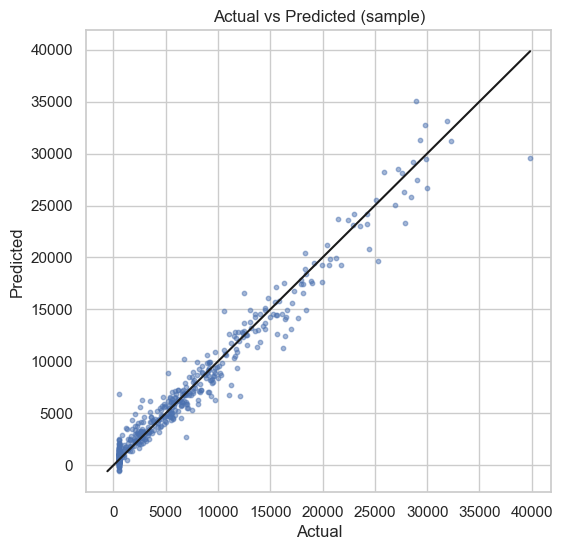

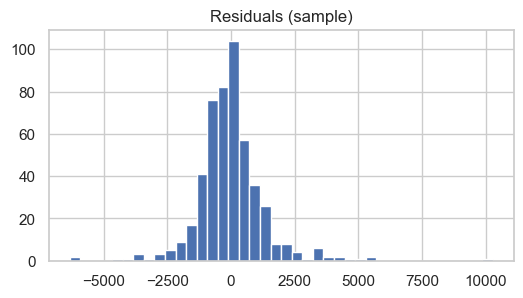

Sample metrics -> RMSE: 1362.5048200417127 MAE: 885.4955485647583 R2: 0.963882677509733


In [146]:
# FEATURE IMPORTANCE + SIMPLE PLOTS: loads pipeline_regression_quick.joblib
import joblib, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pipe = joblib.load("pipeline_regression_quick.joblib")
pre = pipe.named_steps["pre"]
model = pipe.named_steps["model"]

# 1) build feature names list
num_cols = pre.transformers_[0][2]
cat_info = pre.transformers_[1]
cat_cols = cat_info[2]
onehot = cat_info[1].named_steps["onehot"]
try:
    cat_names = list(onehot.get_feature_names_out(cat_cols))
except Exception:
    cat_names = []
    for i, col in enumerate(cat_cols):
        cats = onehot.categories_[i]
        cat_names += [f"{col}__{c}" for c in cats]
feat_names = list(num_cols) + cat_names

# 2) get importances (tree models) or coefficients (linear)
if hasattr(model, "feature_importances_"):
    importances = model.feature_importances_
elif hasattr(model, "coef_"):
    importances = np.abs(model.coef_)
else:
    raise ValueError("Model lacks feature_importances_ / coef_")

fi = pd.Series(importances, index=feat_names).sort_values(ascending=False)
print("Top 20 features:\n", fi.head(20))

# 3) sample evaluation for plots
TARGET = "max_monthly_emi"
X_all = df.drop(columns=[TARGET])
y_all = pd.to_numeric(df[TARGET].astype(str).str.replace(",", "", regex=False), errors="coerce")
mask = y_all.notna()
X_all = X_all.loc[mask].reset_index(drop=True); y_all = y_all.loc[mask].reset_index(drop=True)
sample = X_all.sample(n=min(500, len(X_all)), random_state=42)
y_sample = y_all.loc[sample.index]
preds = pipe.predict(sample)

# plot actual vs predicted
plt.figure(figsize=(6,6)); plt.scatter(y_sample, preds, s=10, alpha=0.5)
mn = min(y_sample.min(), preds.min()); mx = max(y_sample.max(), preds.max())
plt.plot([mn,mx],[mn,mx], color='k'); plt.xlabel("Actual"); plt.ylabel("Predicted"); plt.title("Actual vs Predicted (sample)"); plt.show()

# residuals histogram
res = y_sample - preds
plt.figure(figsize=(6,3)); plt.hist(res, bins=40); plt.title("Residuals (sample)"); plt.show()

# print sample metrics
print("Sample metrics -> RMSE:", mean_squared_error(y_sample,preds,squared=False), "MAE:", mean_absolute_error(y_sample,preds), "R2:", r2_score(y_sample,preds))


## Focused XGBoost tuning (moderate time ~ few minutes) — fast config using tree_method='hist'

In [147]:
# FOCUSED XGB TUNING: faster XGB search with tree_method='hist', n_iter=12
import inspect, joblib, time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from scipy.stats import randint, uniform
import pandas as pd

TARGET = "max_monthly_emi"
dfm = df.dropna(subset=[TARGET]).copy()
dfm[TARGET] = pd.to_numeric(dfm[TARGET].astype(str).str.replace(",", "", regex=False), errors="coerce")
dfm = dfm.dropna(subset=[TARGET]).reset_index(drop=True)

X = dfm.drop(columns=[TARGET])
y = dfm[TARGET].astype(float)

# detect columns
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object','category','bool']).columns.tolist()

# OneHotEncoder compatibility
from sklearn.preprocessing import OneHotEncoder
if "sparse_output" in inspect.signature(OneHotEncoder).parameters:
    onehot = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
else:
    onehot = OneHotEncoder(handle_unknown="ignore", sparse=False)

preprocessor = ColumnTransformer([
    ("num", Pipeline([("imp", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]), numeric_cols),
    ("cat", Pipeline([("imp", SimpleImputer(strategy="most_frequent")), ("onehot", onehot)]), categorical_cols)
], remainder="drop")

xgb = XGBRegressor(objective='reg:squarederror', tree_method='hist', verbosity=0, random_state=42, n_jobs=-1)
pipe = Pipeline([("pre", preprocessor), ("model", xgb)])

# use a subsample of training data for search speed (~40% of train)
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, test_size=0.15, random_state=42)
X_train_small, _, y_train_small, _ = train_test_split(X_train_full, y_train_full, test_size=0.6, random_state=42)

param_dist = {
    "model__n_estimators": randint(100, 400),
    "model__max_depth": randint(3, 9),
    "model__learning_rate": uniform(0.02, 0.2),
    "model__subsample": uniform(0.6, 0.4),
    "model__colsample_bytree": uniform(0.4, 0.4),
    "model__reg_alpha": uniform(0, 1),
    "model__reg_lambda": uniform(0.5, 2)
}

search = RandomizedSearchCV(pipe, param_dist, n_iter=12, cv=3, scoring="neg_root_mean_squared_error", random_state=42, verbose=1, n_jobs=-1)
t0 = time.time()
search.fit(X_train_small, y_train_small)
print("Search completed in {:.1f}s".format(time.time()-t0))
print("Best params:", search.best_params_)
print("Best CV RMSE (on subsample):", -search.best_score_)

# Refit best on train+val and evaluate on holdout test
best_pipe = search.best_estimator_
best_pipe.fit(pd.concat([X_train_full, X_test_full]), pd.concat([y_train_full, y_test_full]))  # note: this uses all data; adjust if you want holdout
joblib.dump(best_pipe, "pipeline_regression_xgb_focused.joblib")
print("Saved focused XGB pipeline to pipeline_regression_xgb_focused.joblib")


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Search completed in 72.1s
Best params: {'model__colsample_bytree': 0.7100531293444459, 'model__learning_rate': 0.2078997883128378, 'model__max_depth': 8, 'model__n_estimators': 369, 'model__reg_alpha': 0.7272719958564209, 'model__reg_lambda': 1.1530815376116708, 'model__subsample': 0.8281775897621597}
Best CV RMSE (on subsample): 1388.0907120748434
Saved focused XGB pipeline to pipeline_regression_xgb_focused.joblib


In [148]:
import joblib
import pandas as pd

# Load final regression model
model_reg = joblib.load("pipeline_regression_xgb_focused.joblib")

# Define a few sample test cases
sample_customers = [
    {
        "age": 30,
        "gender": "Male",
        "marital_status": "Married",
        "education": "Graduate",
        "monthly_salary": 60000,
        "employment_type": "Private",
        "years_of_employment": 5,
        "company_type": "Private",
        "house_type": "Rented",
        "monthly_rent": 12000,
        "family_size": 4,
        "dependents": 2,
        "school_fees": 4000,
        "college_fees": 0,
        "travel_expenses": 3000,
        "groceries_utilities": 8000,
        "other_monthly_expenses": 4000,
        "existing_loans": 1,
        "current_emi_amount": 5000,
        "credit_score": 720,
        "bank_balance": 100000,
        "emergency_fund": 50000,
        "emi_scenario": "Standard",
        "requested_amount": 300000,
        "requested_tenure": 36,
        "emi_eligibility": "Eligible",
        "debt_to_income_ratio": 5000/60000,
        "expense_to_income_ratio": (12000+8000+4000)/60000,
        "savings_ratio": 100000/60000
    },
    {
        "age": 45,
        "gender": "Female",
        "marital_status": "Married",
        "education": "Postgraduate",
        "monthly_salary": 90000,
        "employment_type": "Government",
        "years_of_employment": 15,
        "company_type": "Government",
        "house_type": "Own",
        "monthly_rent": 0,
        "family_size": 5,
        "dependents": 3,
        "school_fees": 10000,
        "college_fees": 5000,
        "travel_expenses": 4000,
        "groceries_utilities": 12000,
        "other_monthly_expenses": 5000,
        "existing_loans": 2,
        "current_emi_amount": 15000,
        "credit_score": 780,
        "bank_balance": 300000,
        "emergency_fund": 150000,
        "emi_scenario": "Standard",
        "requested_amount": 800000,
        "requested_tenure": 60,
        "emi_eligibility": "Eligible",
        "debt_to_income_ratio": 15000/90000,
        "expense_to_income_ratio": (0+12000+5000)/90000,
        "savings_ratio": 300000/90000
    },
    {
        "age": 28,
        "gender": "Male",
        "marital_status": "Single",
        "education": "Graduate",
        "monthly_salary": 25000,
        "employment_type": "Self-employed",
        "years_of_employment": 3,
        "company_type": "Private",
        "house_type": "Rented",
        "monthly_rent": 7000,
        "family_size": 2,
        "dependents": 0,
        "school_fees": 0,
        "college_fees": 0,
        "travel_expenses": 3000,
        "groceries_utilities": 5000,
        "other_monthly_expenses": 3000,
        "existing_loans": 1,
        "current_emi_amount": 4000,
        "credit_score": 650,
        "bank_balance": 25000,
        "emergency_fund": 20000,
        "emi_scenario": "Standard",
        "requested_amount": 150000,
        "requested_tenure": 24,
        "emi_eligibility": "Not_Eligible",
        "debt_to_income_ratio": 4000/25000,
        "expense_to_income_ratio": (7000+5000+3000)/25000,
        "savings_ratio": 25000/25000
    }
]

# Convert to DataFrame
test_df = pd.DataFrame(sample_customers)

# Predict EMI
predictions = model_reg.predict(test_df)

# Display results
for i, emi in enumerate(predictions, start=1):
    print(f"Customer {i}: Predicted Max EMI = ₹{emi:,.0f}")


Customer 1: Predicted Max EMI = ₹8,738
Customer 2: Predicted Max EMI = ₹19,306
Customer 3: Predicted Max EMI = ₹949


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The **EMIPredict AI – Intelligent Financial Risk Assessment Platform** successfully integrates machine learning, financial analytics, and web deployment to solve real-world lending challenges. By combining **classification** (to assess EMI eligibility) and **regression** (to estimate safe EMI limits), the project delivers a comprehensive risk evaluation system for financial institutions and FinTech solutions.

The system demonstrated strong predictive performance across both tasks, supported by **MLflow tracking** for experiment management and a **Streamlit-based user interface** for seamless end-user interaction. Through this project, key data science processes — from **data cleaning, feature engineering, and model building** to **deployment and monitoring** — were implemented in a full end-to-end workflow.

Overall, **EMIPredict AI** represents a step toward more transparent, data-driven, and automated lending decisions. It not only enhances customer experience by offering personalized EMI insights but also empowers banks and FinTech companies to minimize credit risk, improve approval accuracy, and accelerate loan processing time.

---



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***